In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from datetime import datetime

# Load data

In [3]:
train_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Training_Data/4_Training_Weather_Data_2014_2021.csv')
train_trait = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Training_Data/1_Training_Trait_Data_2014_2021.csv')

train_weather['Date'] = pd.to_datetime(train_weather['Date'], format='%Y%m%d')
train_weather['Month_Day'] = train_weather['Date'].dt.strftime('%m-%d')
train_weather['Field_Location'] = train_weather['Env'].str.replace('_\d{4}', '')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94204/1708918500.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  train_weather['Field_Location'] = train_weather['Env'].str.replace('_\d{4}', '')


In [12]:
test_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Testing_Data/4_Testing_Weather_Data_2022.csv')

test_weather['Date'] = pd.to_datetime(test_weather['Date'], format='%Y%m%d')
test_weather['Month_Day'] = test_weather['Date'].dt.strftime('%m-%d')
test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94204/1643920210.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')


In [5]:
train_weather.head()

Env       Date  QV2M  T2MDEW      PS   RH2M  WS2M  GWETTOP  \
0  ARH1_2016 2016-01-01  3.54   -0.78  102.34  77.00  2.15     0.84   
1  ARH1_2016 2016-01-02  3.23   -1.91  102.04  74.62  1.49     0.84   
2  ARH1_2016 2016-01-03  4.09    1.05  101.59  80.69  1.95     0.84   
3  ARH1_2016 2016-01-04  2.87   -3.49  102.24  79.88  3.45     0.84   
4  ARH1_2016 2016-01-05  2.81   -3.64  102.37  78.81  1.95     0.84   

   ALLSKY_SFC_SW_DWN  ALLSKY_SFC_PAR_TOT  T2M_MAX  T2M_MIN  T2MWET  GWETROOT  \
0               8.21               41.96     7.80    -0.70    1.15      0.83   
1              11.28               55.13    10.15    -3.10    0.42      0.83   
2               9.78               49.21    12.39    -1.29    2.72      0.83   
3               7.35               35.66     4.56    -4.00   -1.79      0.83   
4              13.00               62.04     6.94    -4.59   -1.74      0.82   

    T2M  GWETPROF  ALLSKY_SFC_SW_DNI  PRECTOTCORR Month_Day Field_Location  
0  3.08       0.8               5.96          0.0     01-01           ARH1  
1  2.74       0.8              16.13          0.0     01-02           ARH1  
2  4.38       0.8              18.36          0.0     01-03           ARH1  
3 -0.09       0.8              10.87          0.0     01-04           ARH1  
4  0.16       0.8              27.02          0.0     01-05           ARH1

In [6]:
train_trait.head()

Env  Year Field_Location   Experiment  Replicate  Block  Plot  Range  \
0  DEH1_2014  2014           DEH1  G2F_2014_15          1      1     1    1.0   
1  DEH1_2014  2014           DEH1  G2F_2014_15          1      1     2    1.0   
2  DEH1_2014  2014           DEH1  G2F_2014_15          1      1     3    1.0   
3  DEH1_2014  2014           DEH1  G2F_2014_15          1      1     4    1.0   
4  DEH1_2014  2014           DEH1  G2F_2014_15          1      1     5    1.0   

   Pass       Hybrid  ... Stand_Count_plants Pollen_DAP_days Silk_DAP_days  \
0   1.0  M0088/LH185  ...               56.0            63.0          67.0   
1   2.0  M0143/LH185  ...               54.0            61.0          63.0   
2   3.0  M0003/LH185  ...               60.0            63.0          65.0   
3   4.0  M0035/LH185  ...               59.0            61.0          63.0   
4   5.0  M0052/LH185  ...               58.0            63.0          65.0   

   Plant_Height_cm Ear_Height_cm Root_Lodging_plants  Stalk_Lodging_plants  \
0            213.0          79.0                 0.0                   0.0   
1            286.0         172.0                 0.0                   0.0   
2            239.0          92.0                 0.0                   4.0   
3            242.0         118.0                 0.0                   0.0   
4            211.0          92.0                 0.0                   0.0   

   Yield_Mg_ha  Grain_Moisture   Twt_kg_m3  
0     5.721725            20.8  706.664693  
1    11.338246            25.8  693.792841  
2     6.540810            20.8  698.941582  
3    10.366857            23.7  711.813434  
4    10.908814            19.4  743.993065  

[5 rows x 26 columns]

<AxesSubplot:xlabel='Env', ylabel='Yield_Mg_ha'>

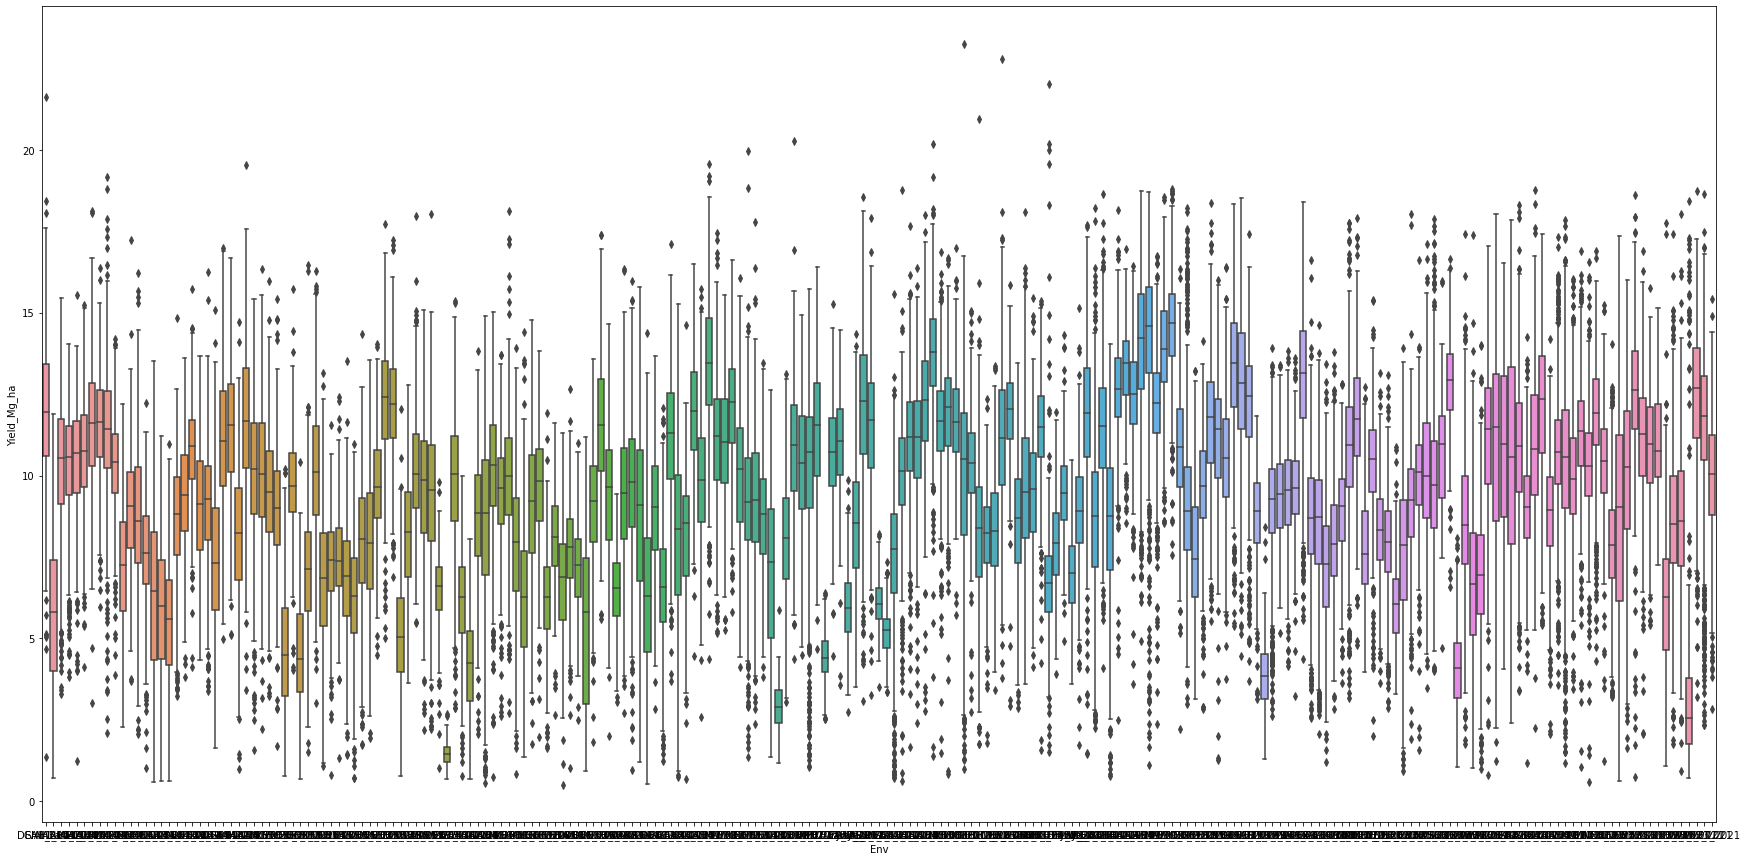

In [7]:
# Yield distribution of environments
plt.figure(figsize=(30, 15))
sns.boxplot(data=train_trait, x="Env", y="Yield_Mg_ha")

In [77]:
# Different environments (field location + year)
print(len(train_weather['Env'].unique()))
print(train_weather['Env'].unique())

212
['ARH1_2016' 'ARH1_2017' 'ARH1_2018' 'ARH2_2016' 'ARH2_2017' 'ARH2_2018'
 'COH1_2017' 'COH1_2021' 'DEH1_2015' 'DEH1_2016' 'DEH1_2017' 'DEH1_2018'
 'DEH1_2019' 'DEH1_2020' 'DEH1_2021' 'GAH1_2015' 'GAH1_2016' 'GAH1_2017'
 'GAH1_2018' 'GAH1_2019' 'GAH1_2020' 'GAH1_2021' 'GAH2_2016' 'GAH2_2017'
 'GAH2_2018' 'GAH2_2019' 'GAH2_2020' 'GAH2_2021' 'GEH1_2019' 'GEH1_2020'
 'GEH1_2021' 'IAH1_2015' 'IAH1_2017' 'IAH1_2019' 'IAH1_2020' 'IAH1_2021'
 'IAH2_2017' 'IAH2_2019' 'IAH2_2021' 'IAH3_2015' 'IAH3_2017' 'IAH3_2019'
 'IAH3_2021' 'IAH4_2015' 'IAH4_2017' 'IAH4_2019' 'IAH4_2021' 'ILH1_2015'
 'ILH1_2016' 'ILH1_2018' 'ILH1_2019' 'INH1_2015' 'INH1_2016' 'INH1_2018'
 'INH1_2019' 'INH1_2020' 'INH1_2021' 'KSH1_2015' 'KSH1_2016' 'KSH1_2018'
 'MIH1_2016' 'MIH1_2017' 'MIH1_2018' 'MIH1_2019' 'MIH1_2020' 'MIH1_2021'
 'MNH1_2015' 'MNH1_2016' 'MNH1_2018' 'MNH1_2019' 'MNH1_2020' 'MNH1_2021'
 'MOH1_2015' 'MOH1_2016' 'MOH1_2017' 'MOH1_2019' 'MOH1_1_2020'
 'MOH1_2_2020' 'MOH1_1_2018' 'MOH1_2_2018' 'MOH2_2015' 'N

In [78]:
# Different field locations
print(len(train_weather['Field_Location'].unique()))
print(train_weather['Field_Location'].unique())

47
['ARH1' 'ARH2' 'COH1' 'DEH1' 'GAH1' 'GAH2' 'GEH1' 'IAH1' 'IAH2' 'IAH3'
 'IAH4' 'ILH1' 'INH1' 'KSH1' 'MIH1' 'MNH1' 'MOH1' 'MOH1_1' 'MOH1_2' 'MOH2'
 'NCH1' 'NEH1' 'NEH2' 'NEH3' 'NEH4' 'NYH1' 'NYH2' 'NYH3' 'NYS1' 'OHH1'
 'ONH1' 'ONH2' 'SCH1' 'SDH1' 'TXH1' 'TXH1-Dry' 'TXH1-Early' 'TXH1-Late'
 'TXH2' 'TXH3' 'WIH1' 'WIH2' 'WIH3' 'IAH1b' 'IAH1c' 'IAH1a' 'TXH4']


# Visualize weather features

In [79]:
train_weather.columns

Index(['Env', 'Date', 'QV2M', 'T2MDEW', 'PS', 'RH2M', 'WS2M', 'GWETTOP',
       'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M_MAX', 'T2M_MIN',
       'T2MWET', 'GWETROOT', 'T2M', 'GWETPROF', 'ALLSKY_SFC_SW_DNI',
       'PRECTOTCORR', 'Field_Location', 'Month_Day'],
      dtype='object')

In [80]:
train_weather.shape

(77431, 20)

<AxesSubplot:xlabel='Date', ylabel='QV2M'>

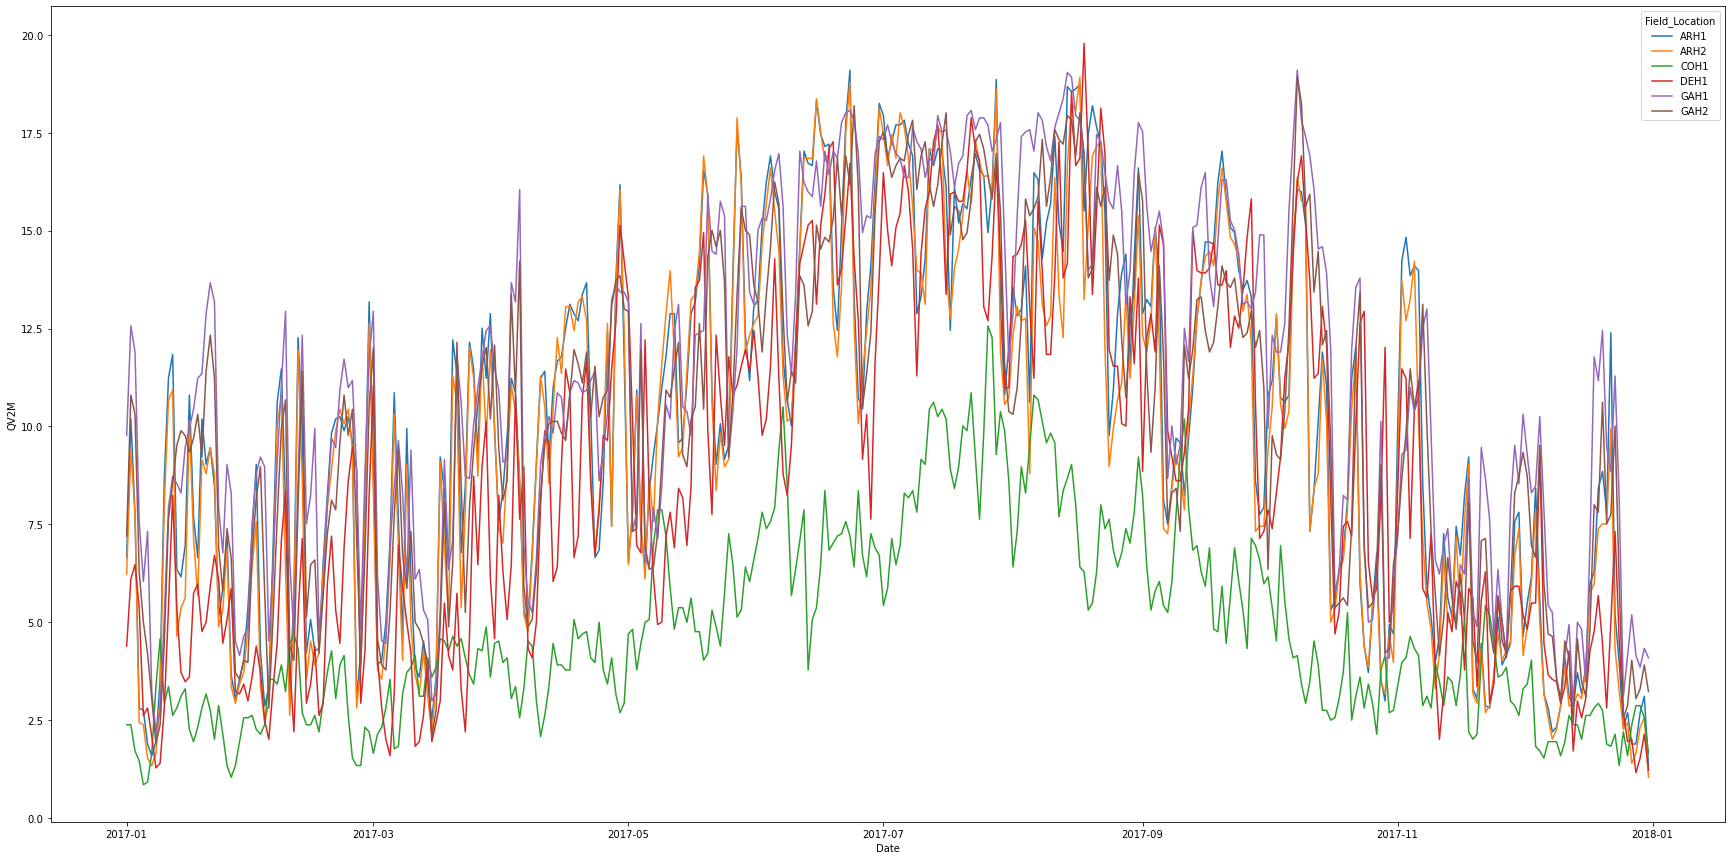

In [13]:
# plot_df = train_weather 
# plot_df = train_weather[train_weather['Env']=='ARH1_2016']
# plot_df = train_weather[train_weather['Field_Location'].isin(['ARH1', 'ARH2', 'COH1', 'DEH1', 'GAH1', 'GAH2'])]
plot_df = train_weather[train_weather['Env'].isin(['ARH1_2017', 'ARH2_2017', 'COH1_2017', 'DEH1_2017', 'GAH1_2017', 'GAH2_2017'])]

plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "QV2M", hue = "Field_Location")
# sns.lineplot(x = "Date", y = "Col_2", data = plot_df)

<AxesSubplot:xlabel='Date', ylabel='T2MDEW'>

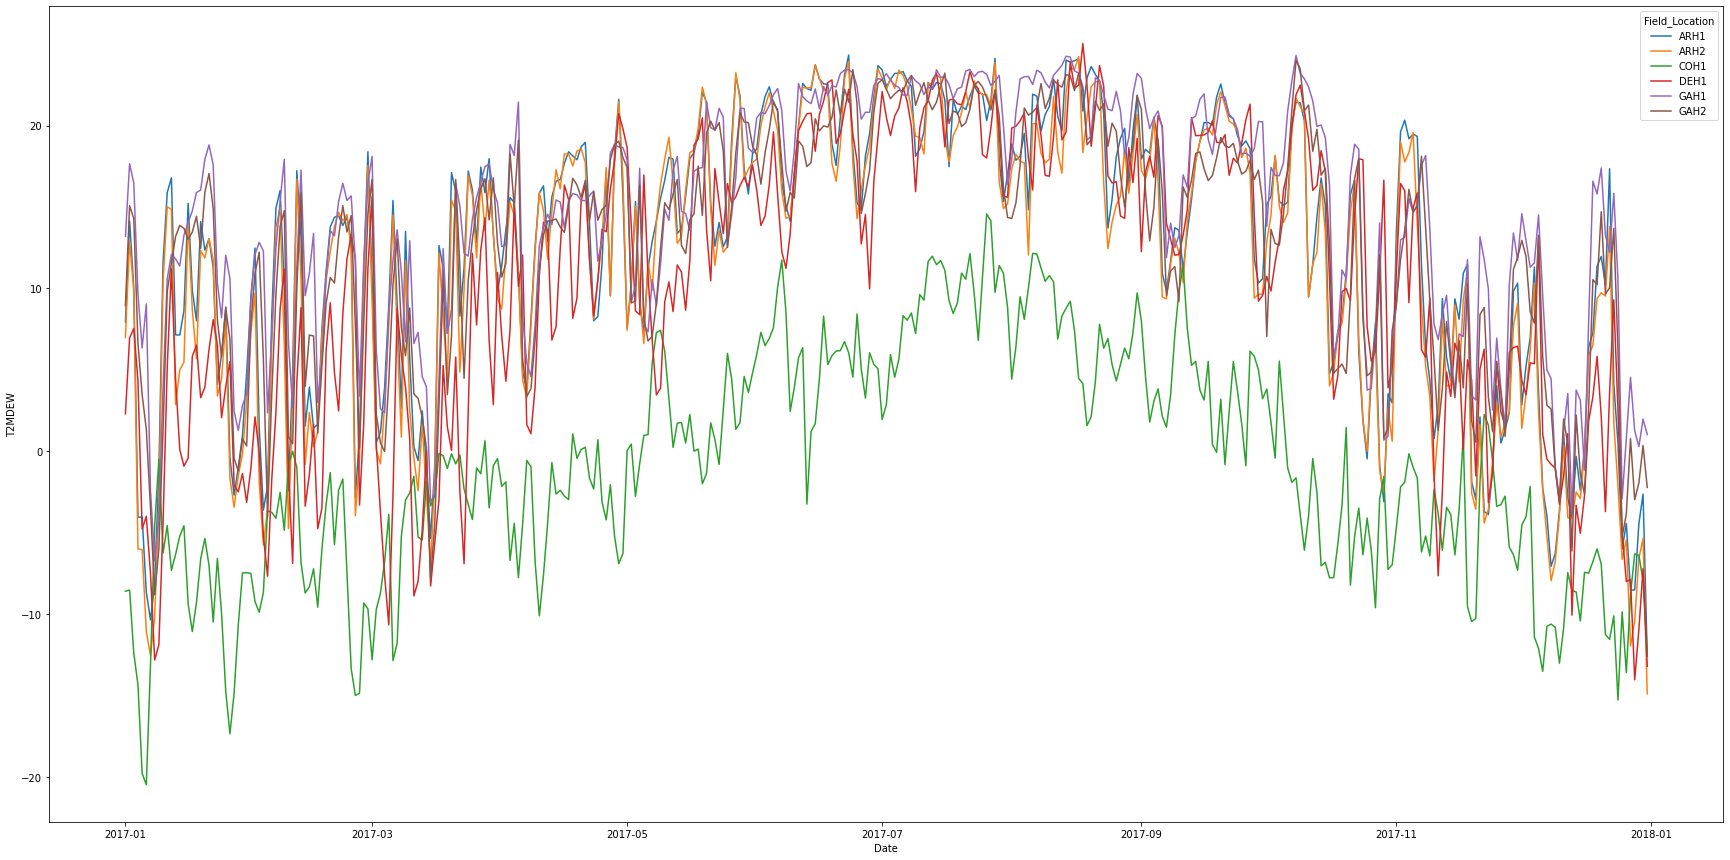

In [14]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "T2MDEW", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='PS'>

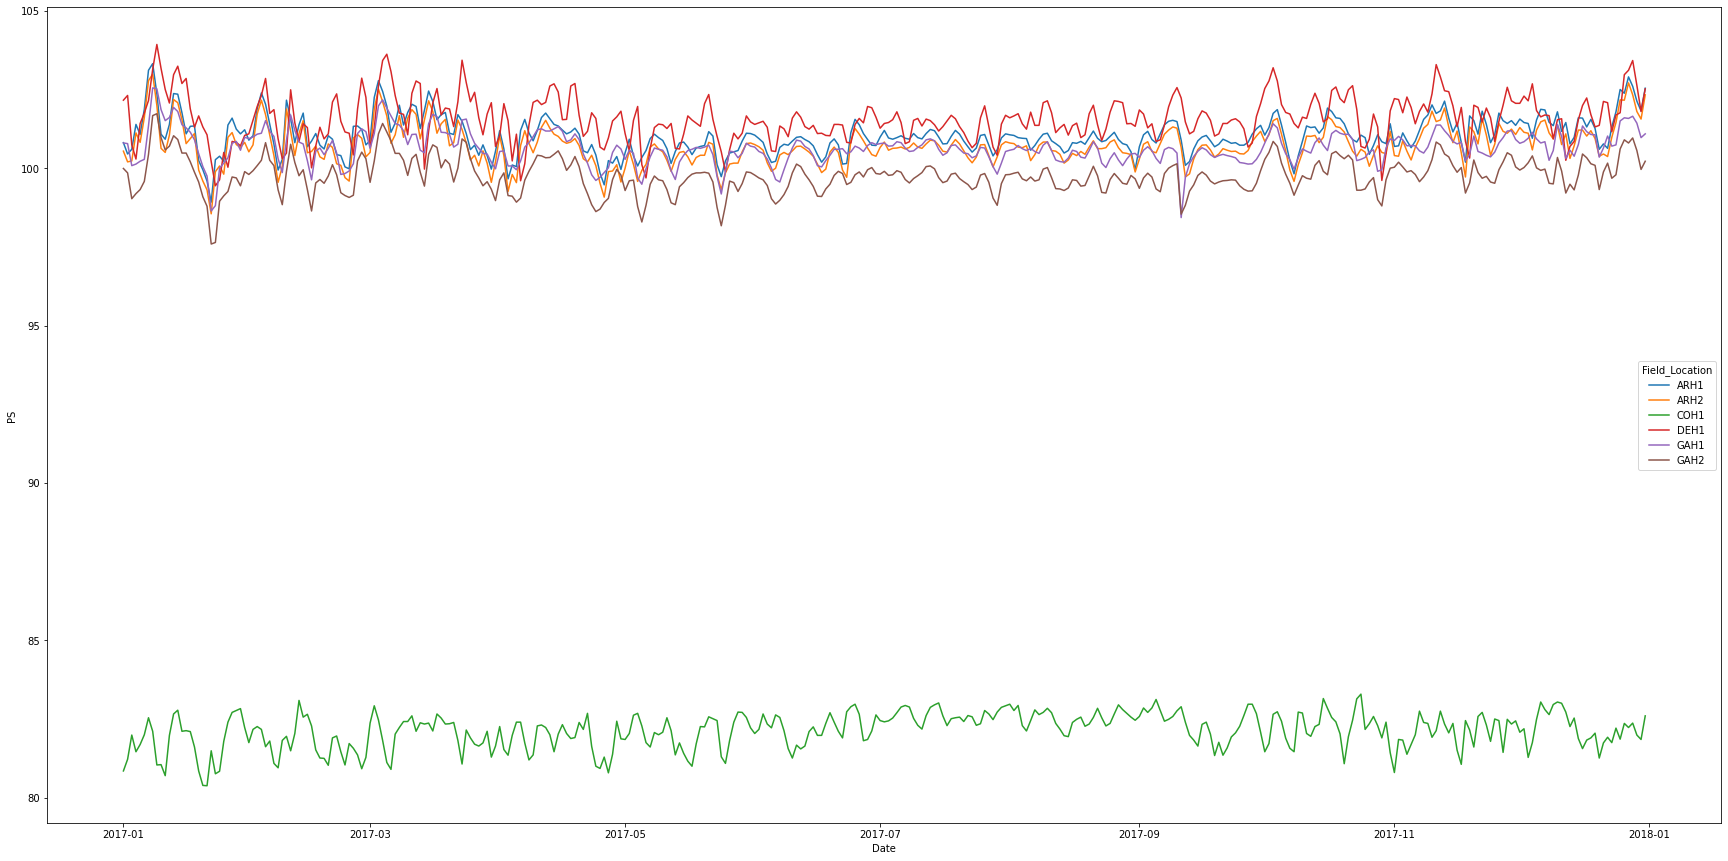

In [15]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "PS", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='RH2M'>

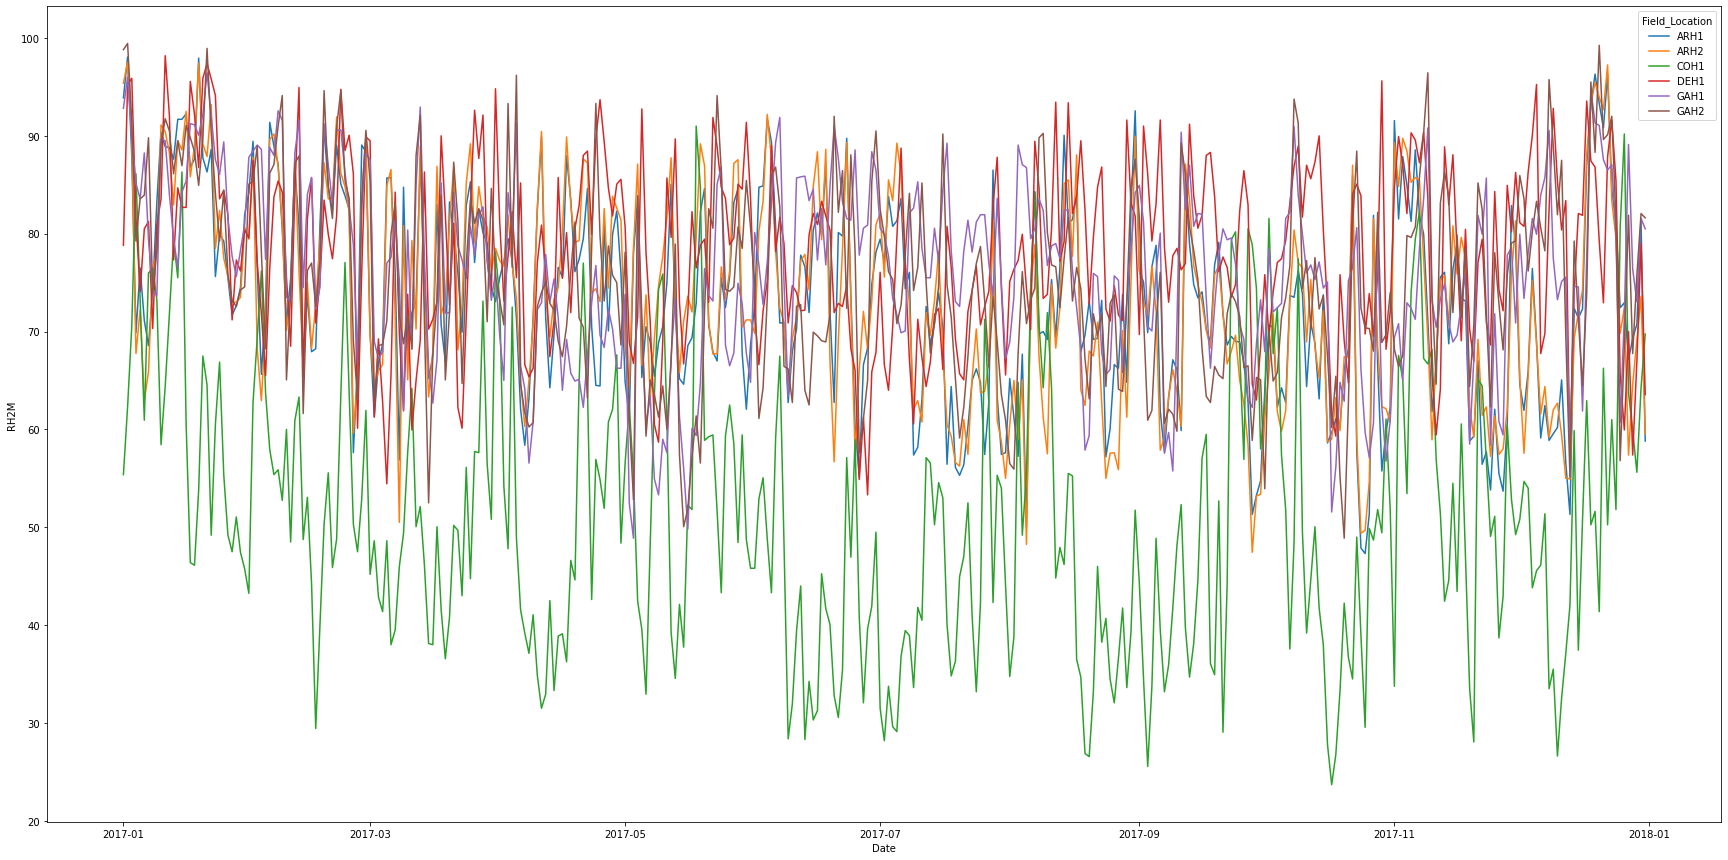

In [16]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "RH2M", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='WS2M'>

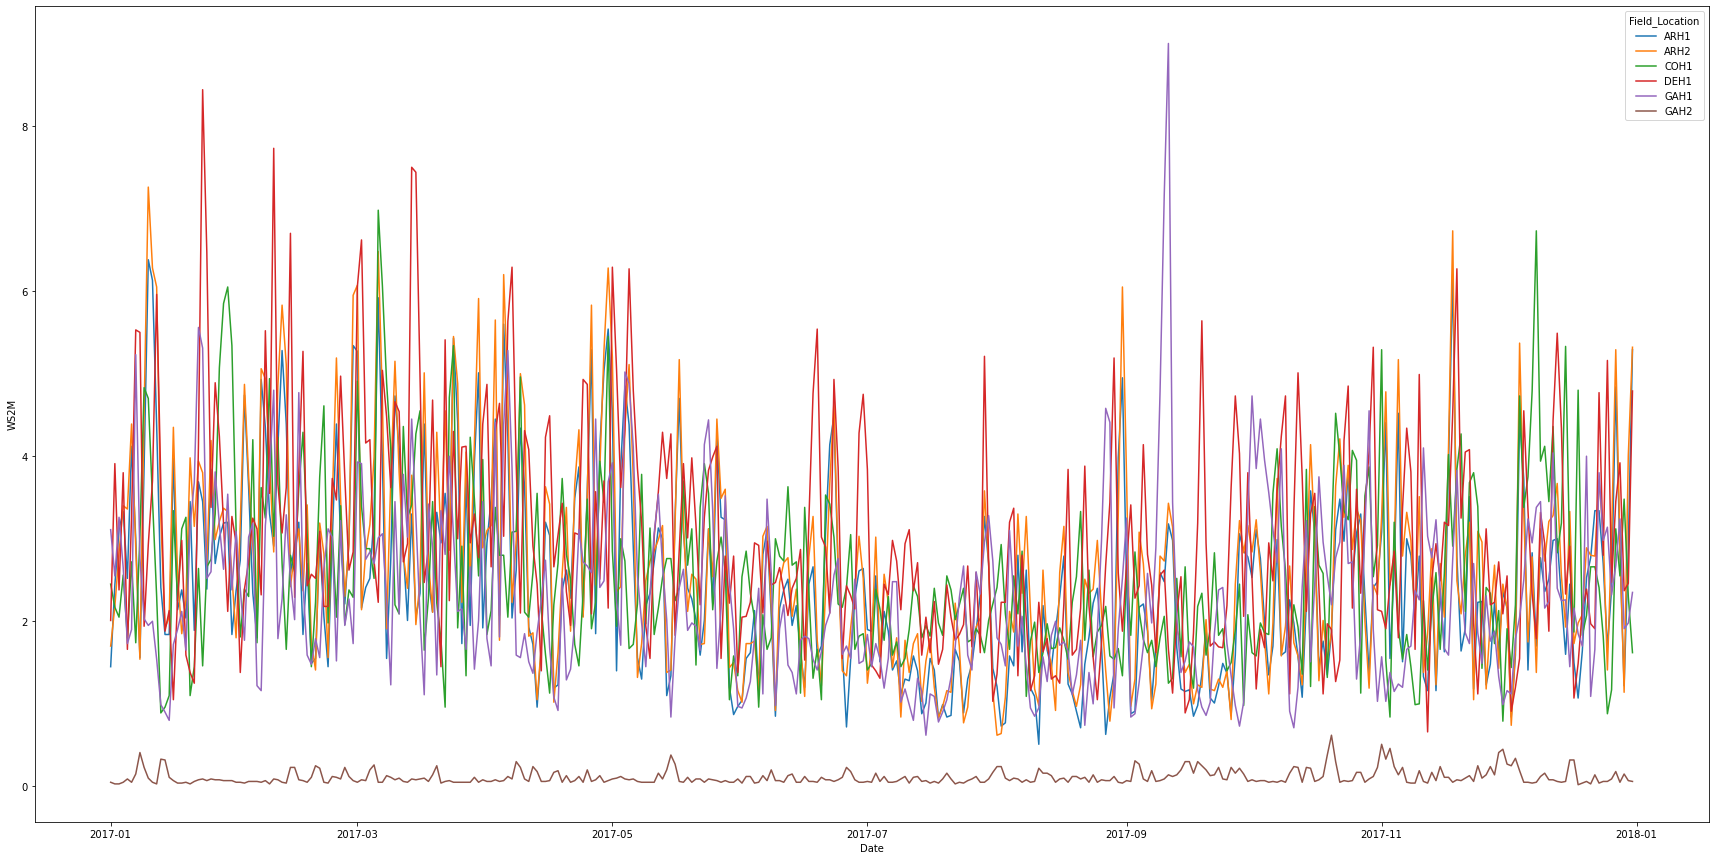

In [17]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "WS2M", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='GWETTOP'>

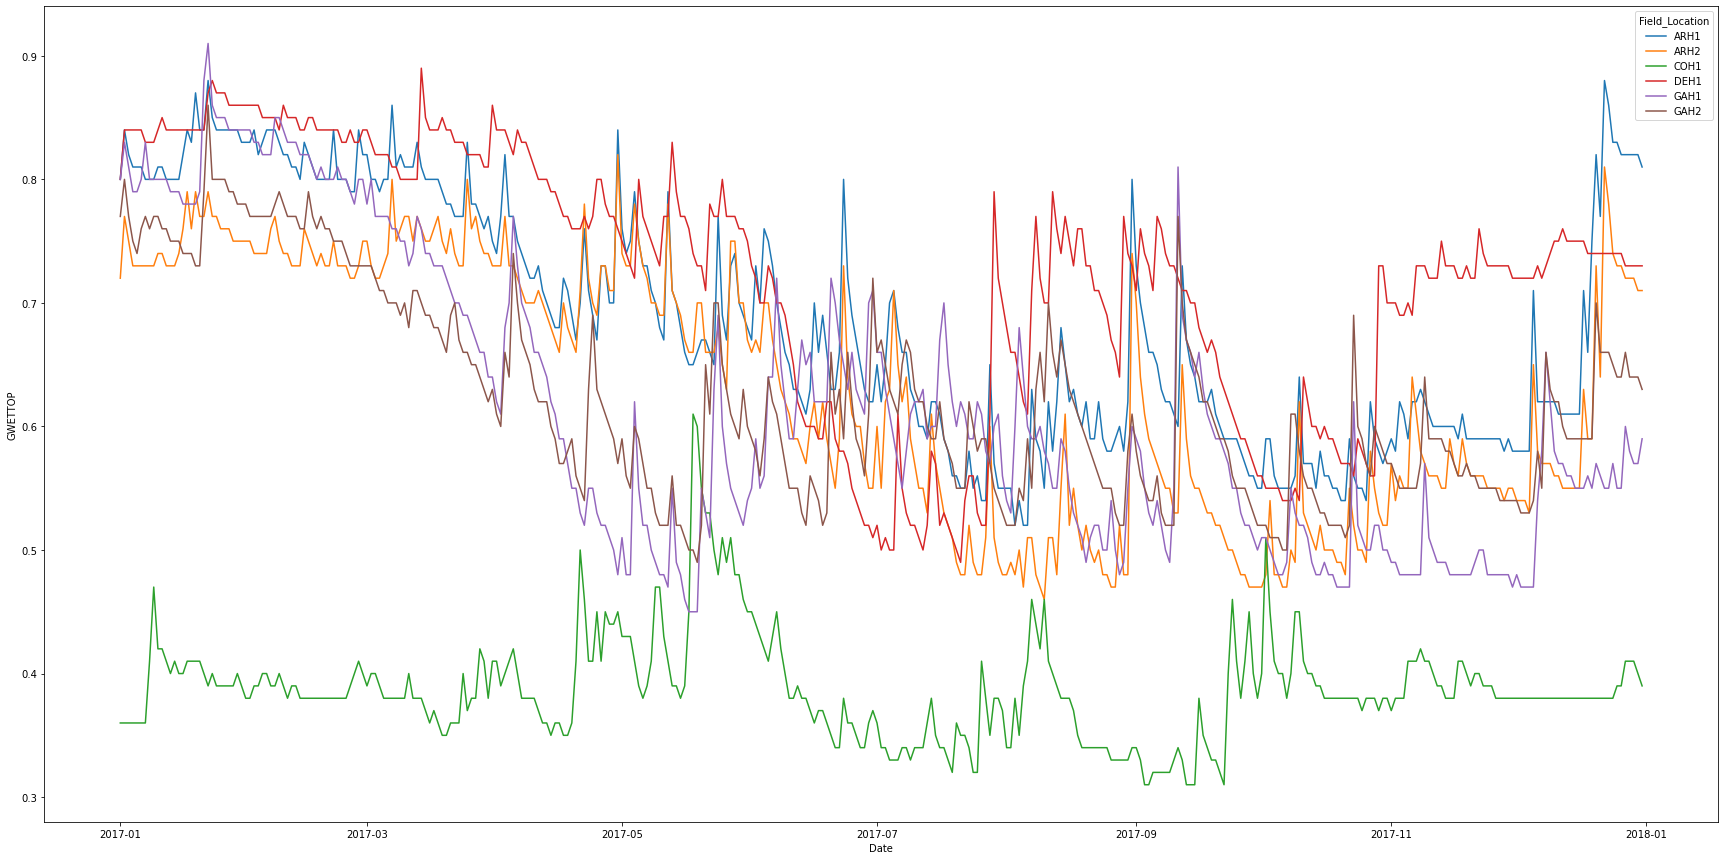

In [18]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "GWETTOP", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='ALLSKY_SFC_SW_DWN'>

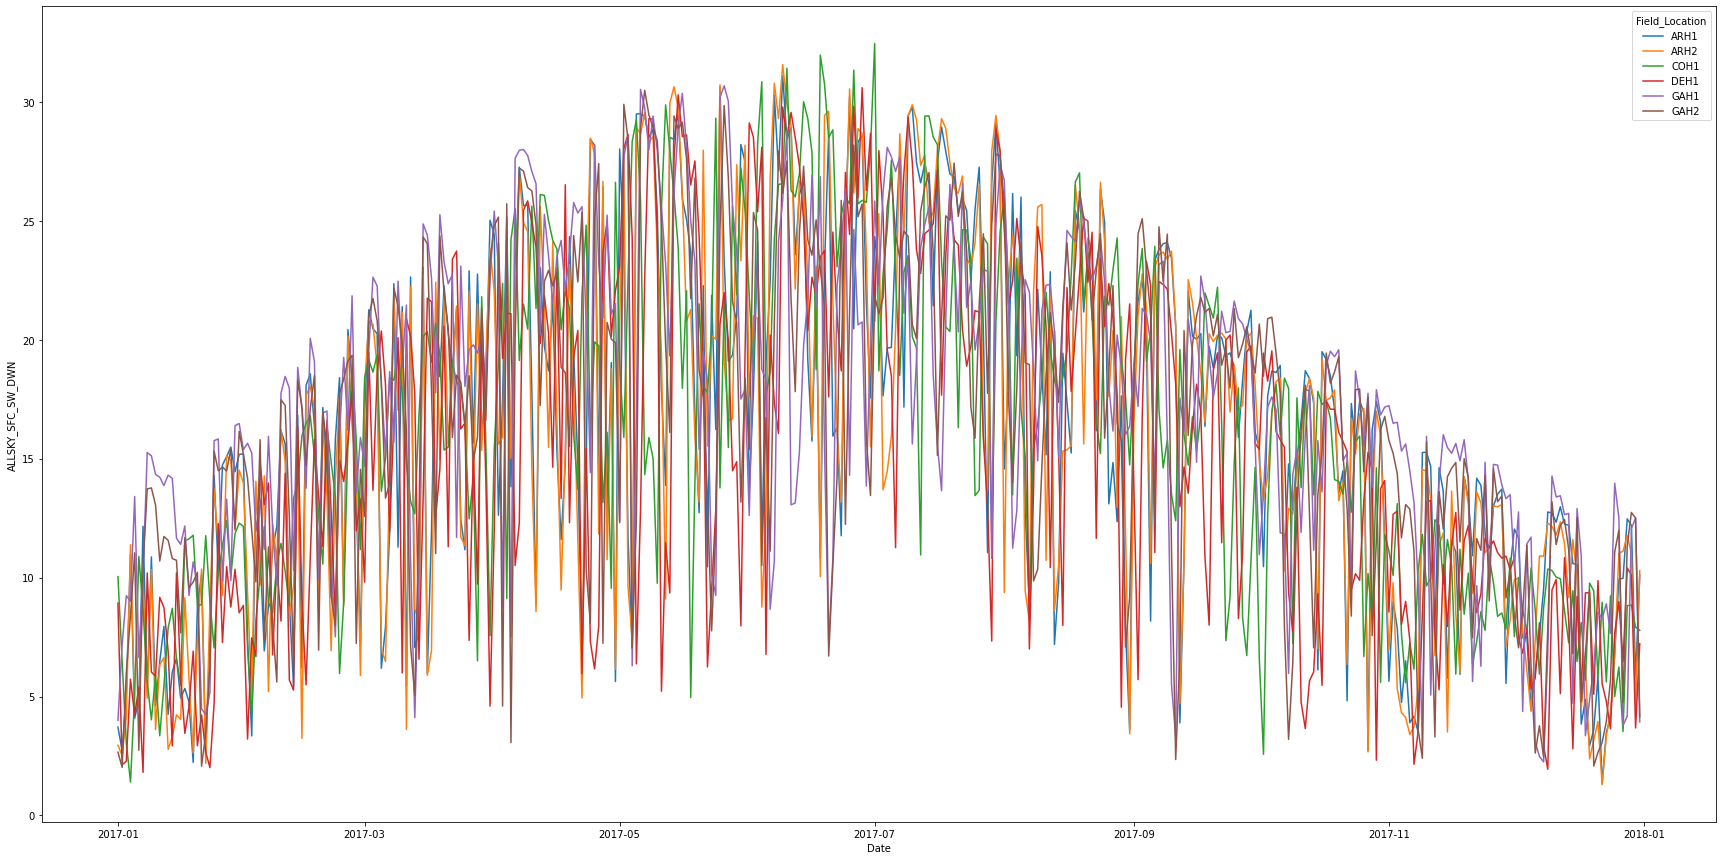

In [19]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "ALLSKY_SFC_SW_DWN", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='ALLSKY_SFC_PAR_TOT'>

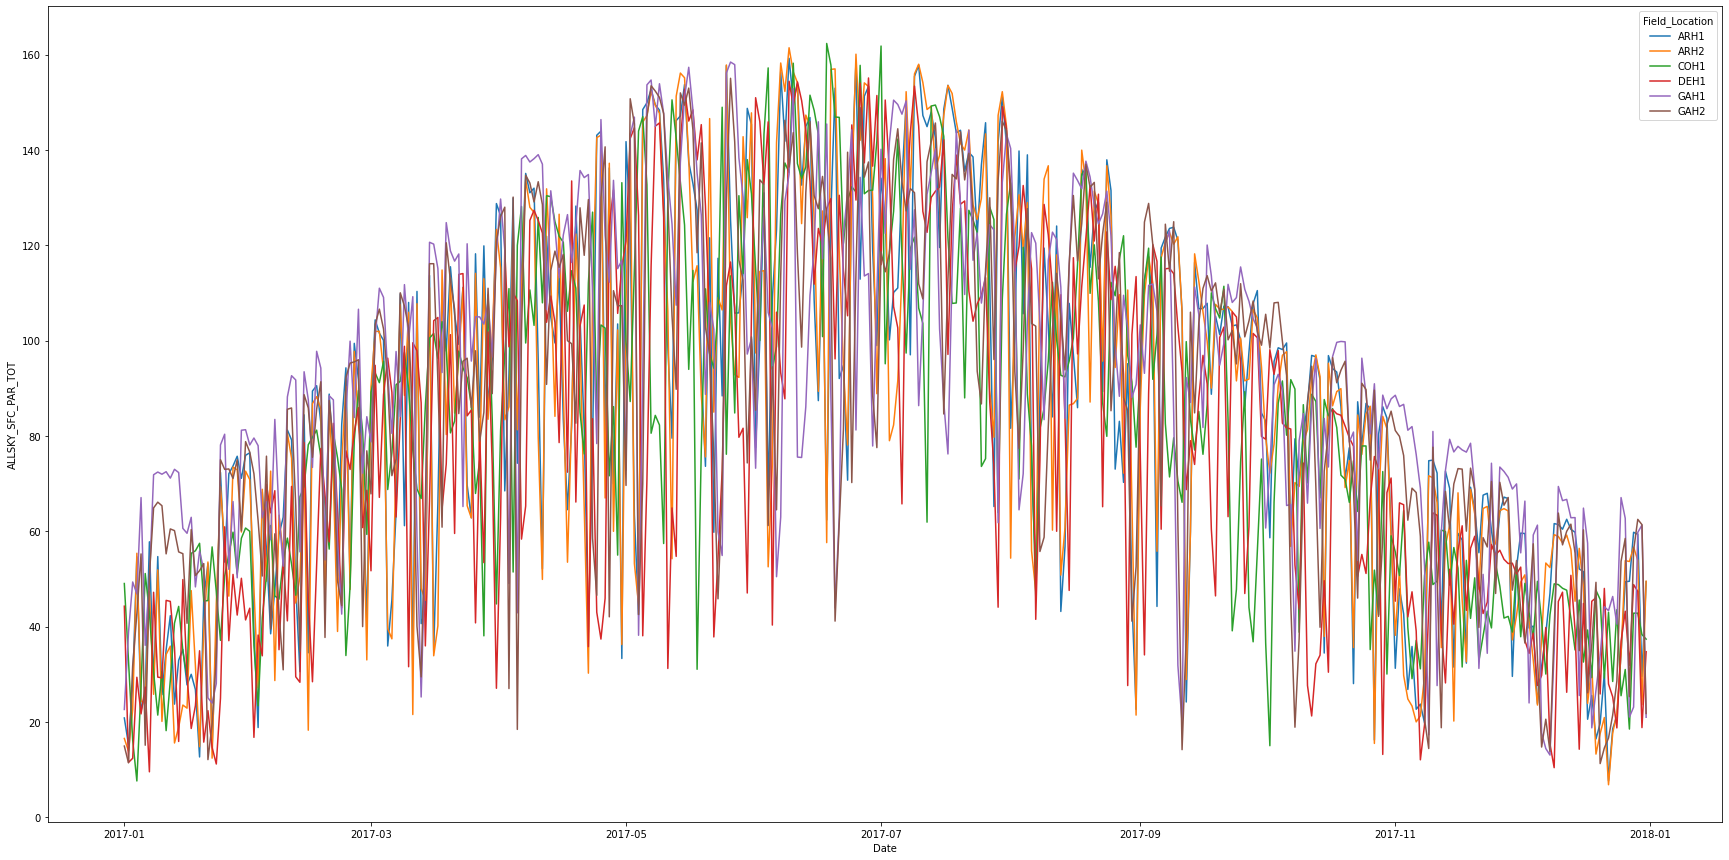

In [20]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "ALLSKY_SFC_PAR_TOT", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='T2M_MAX'>

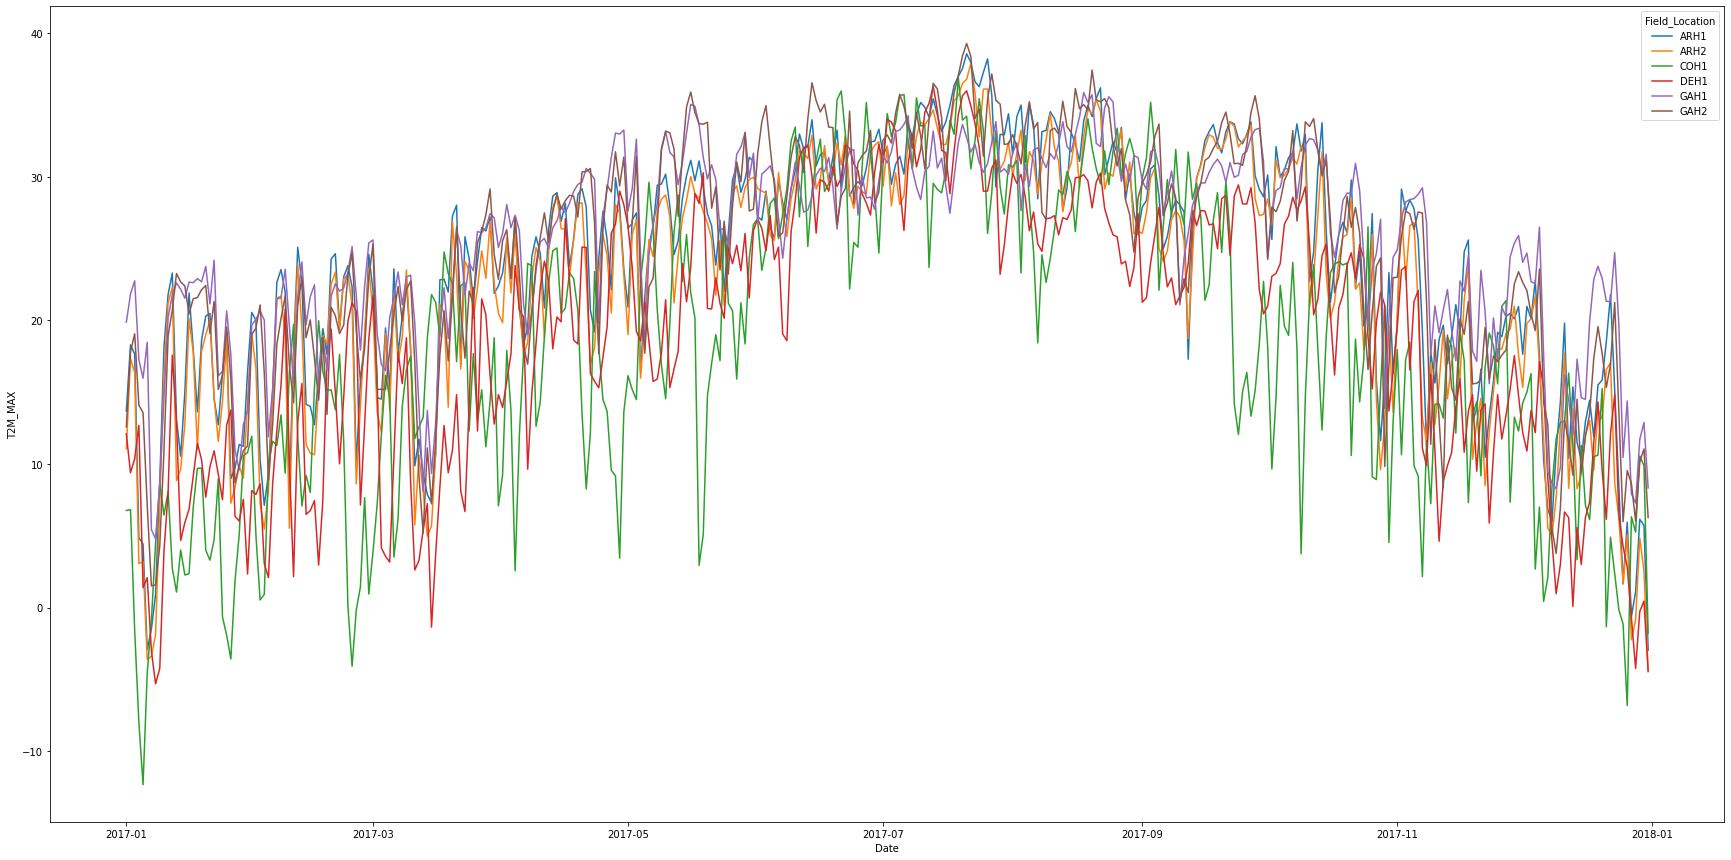

In [21]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "T2M_MAX", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='T2M_MIN'>

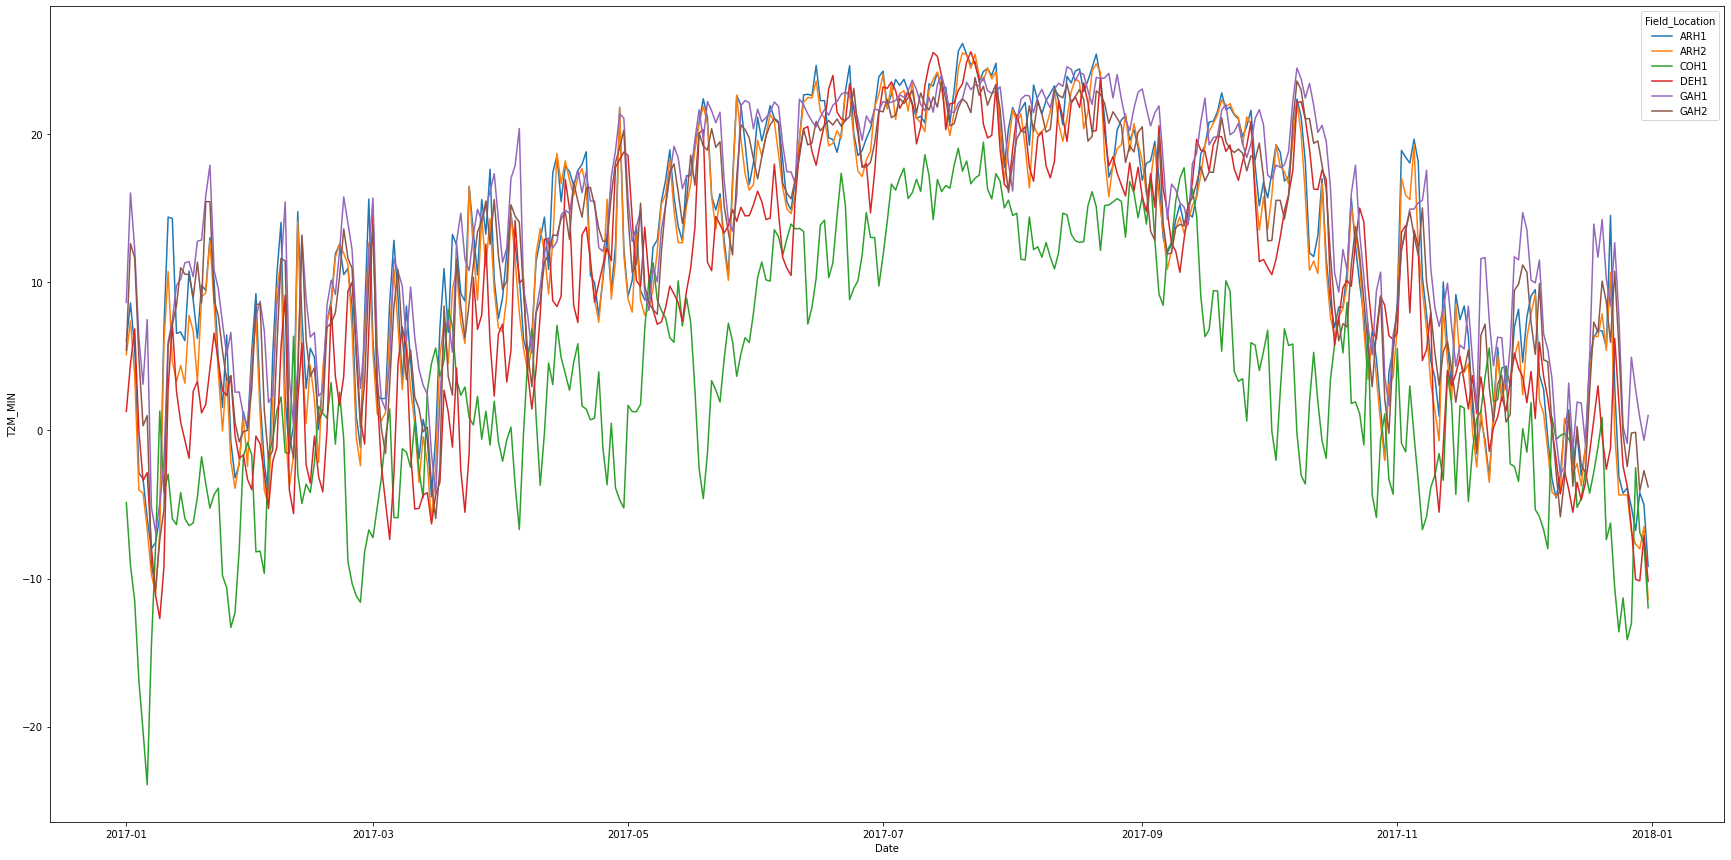

In [22]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "T2M_MIN", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='T2MWET'>

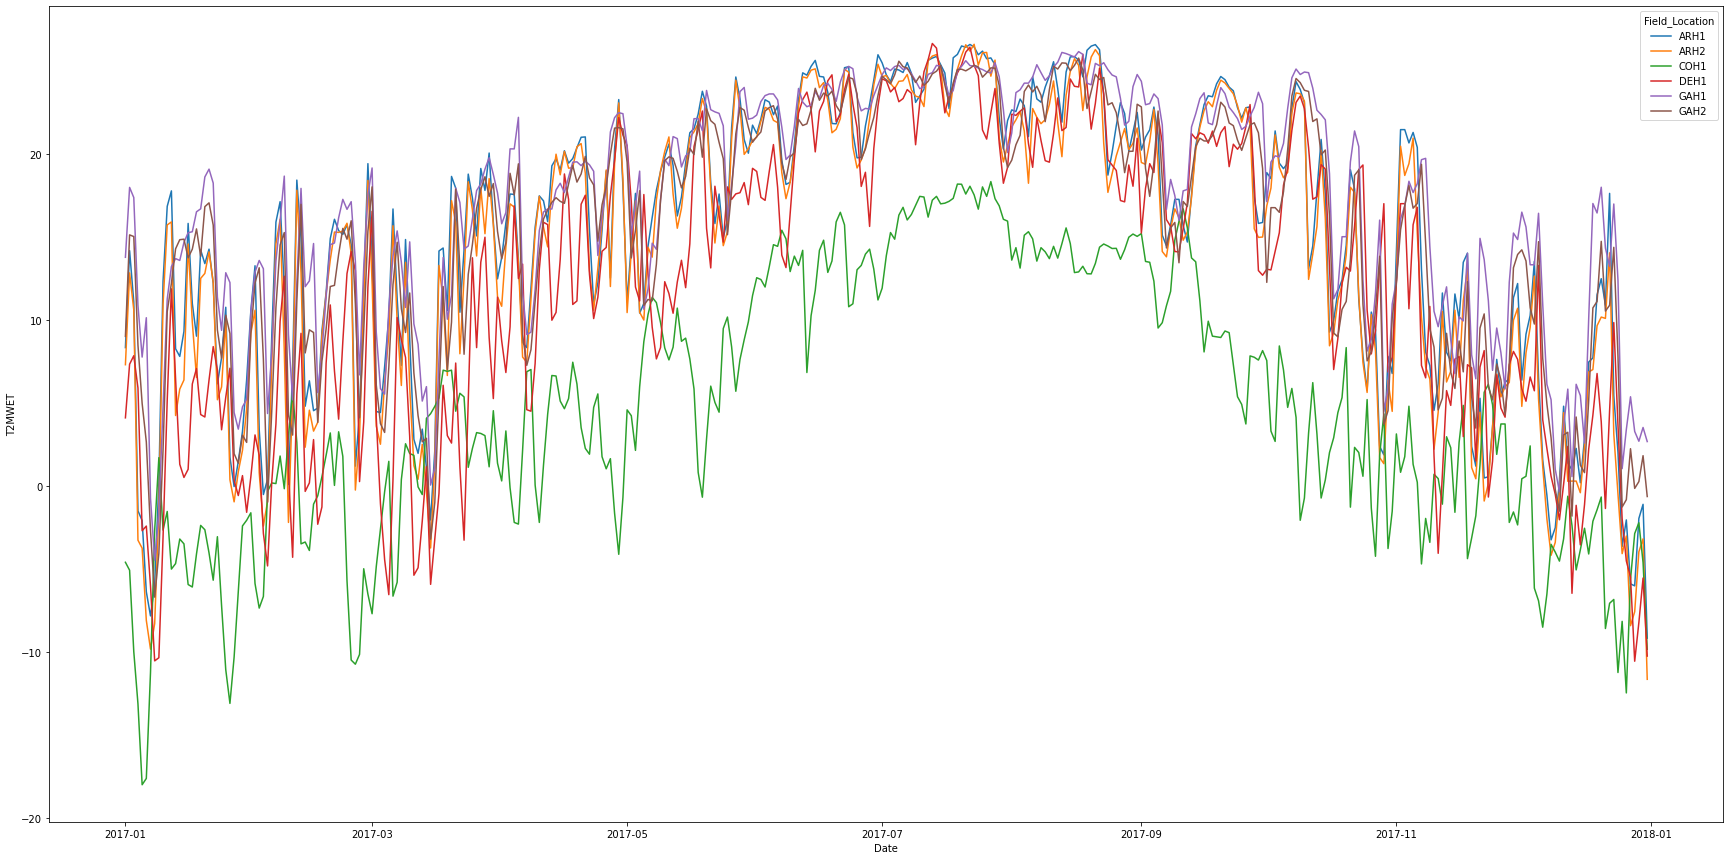

In [23]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "T2MWET", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='T2M'>

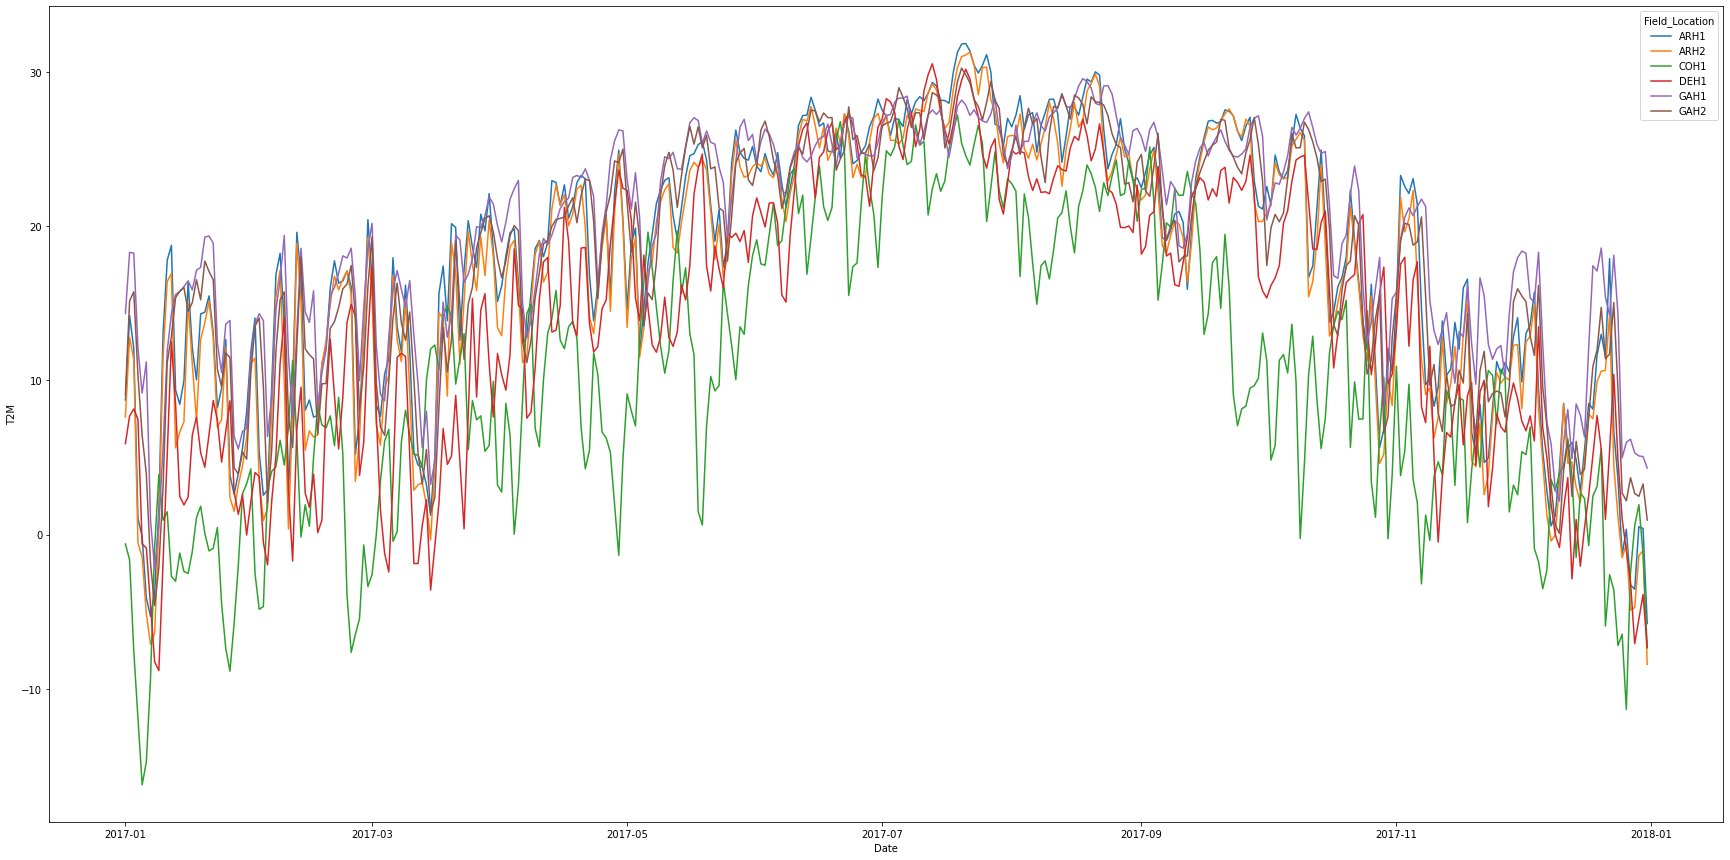

In [24]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "T2M", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='GWETPROF'>

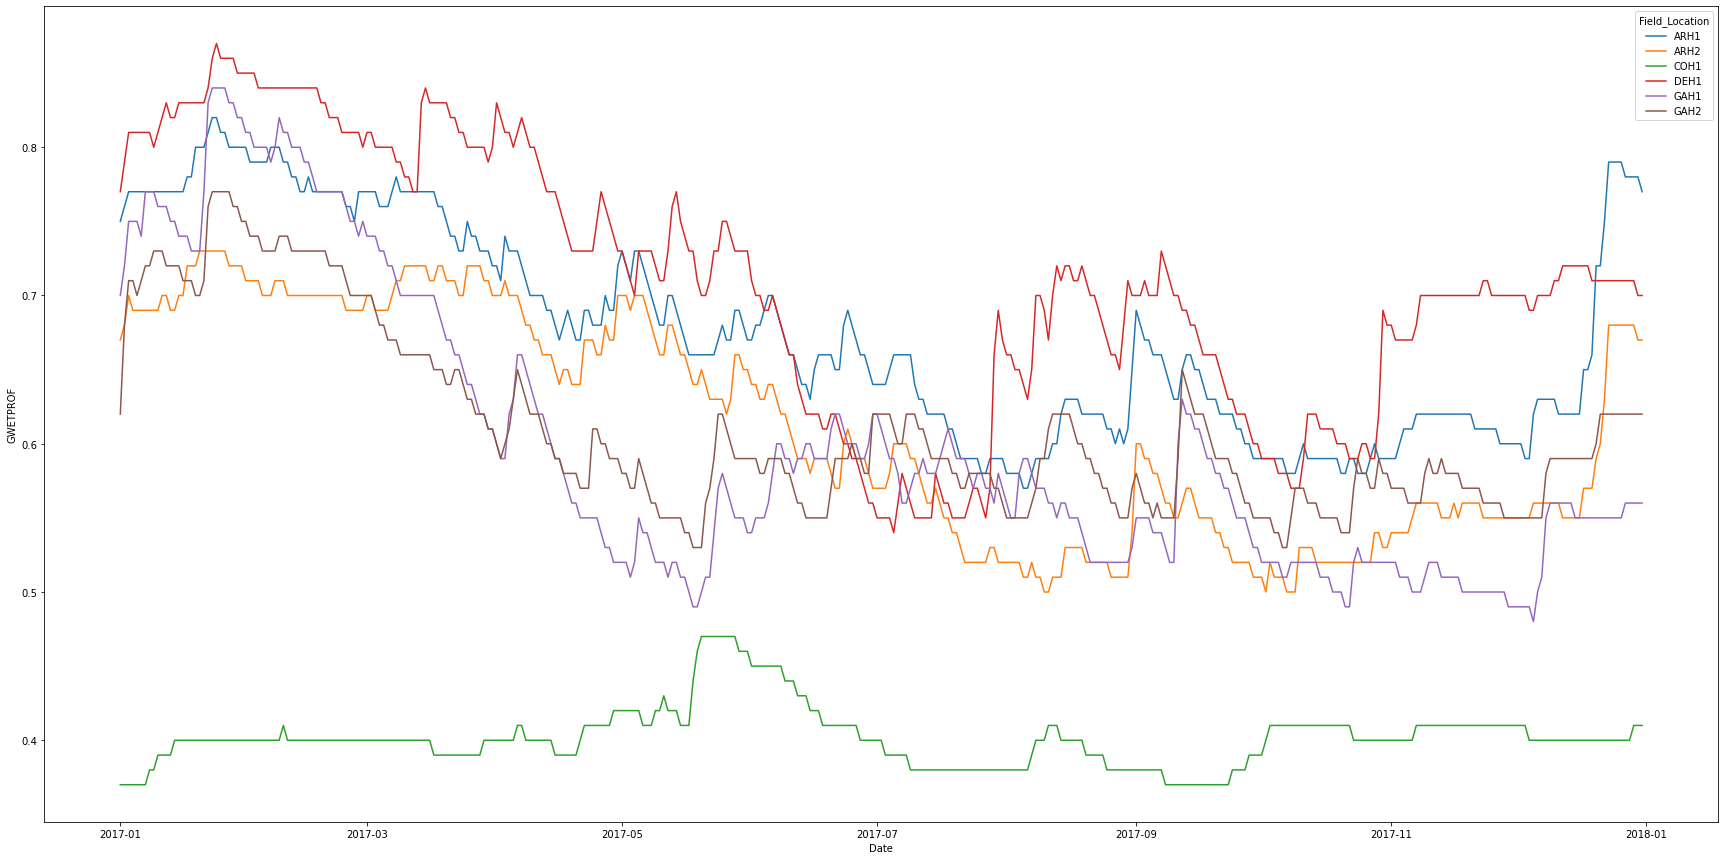

In [25]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "GWETPROF", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='ALLSKY_SFC_SW_DNI'>

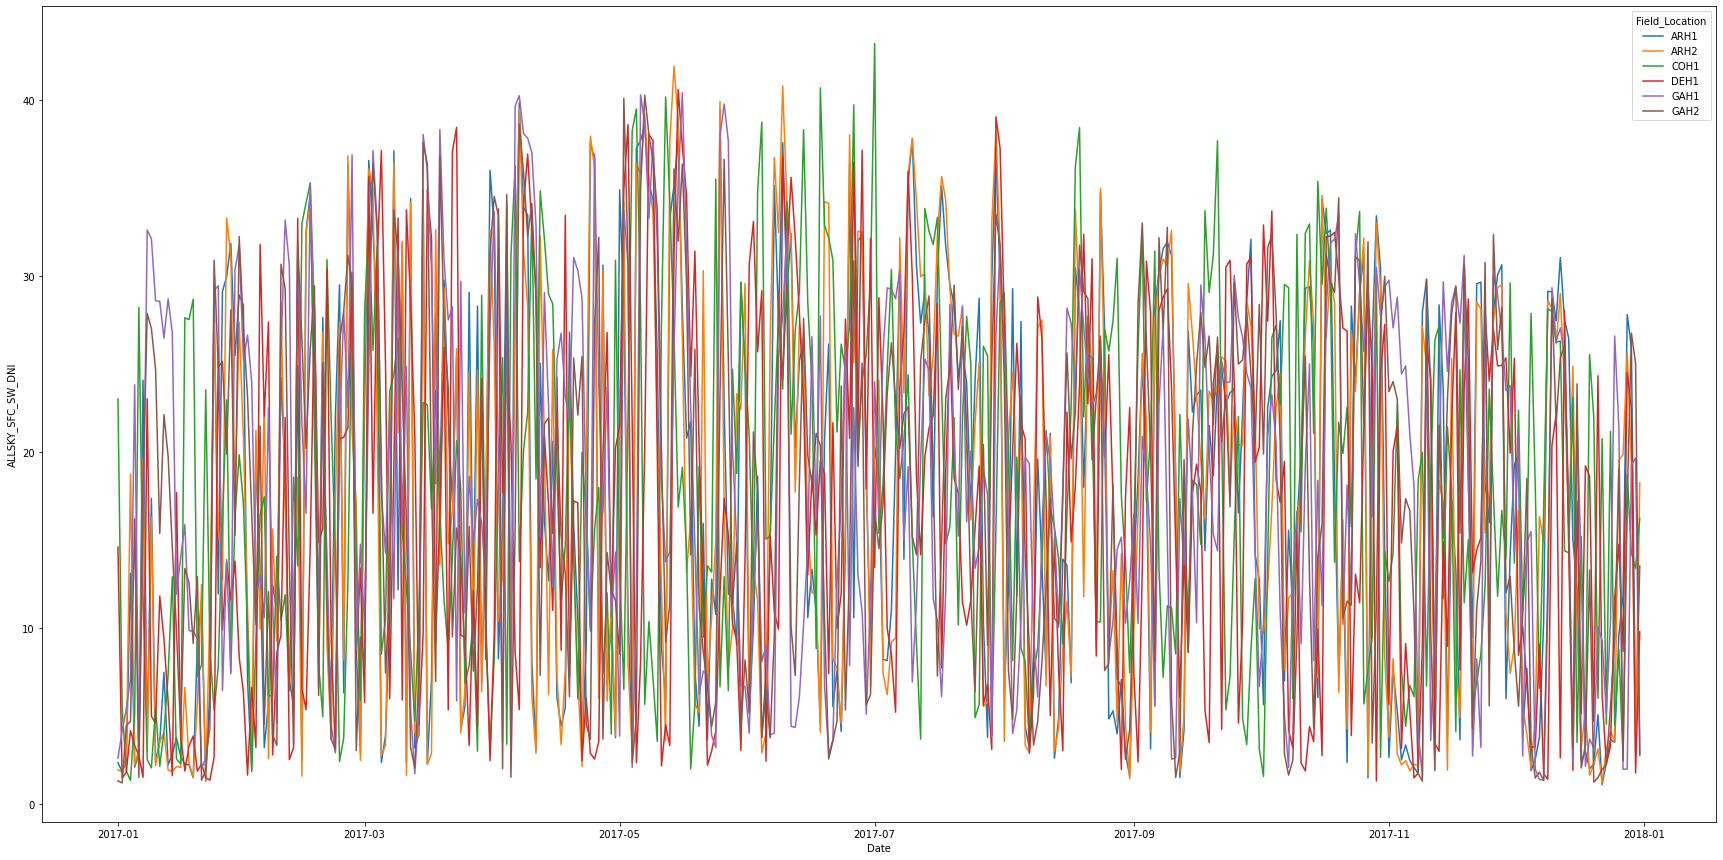

In [26]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "ALLSKY_SFC_SW_DNI", hue = "Field_Location")

<AxesSubplot:xlabel='Date', ylabel='PRECTOTCORR'>

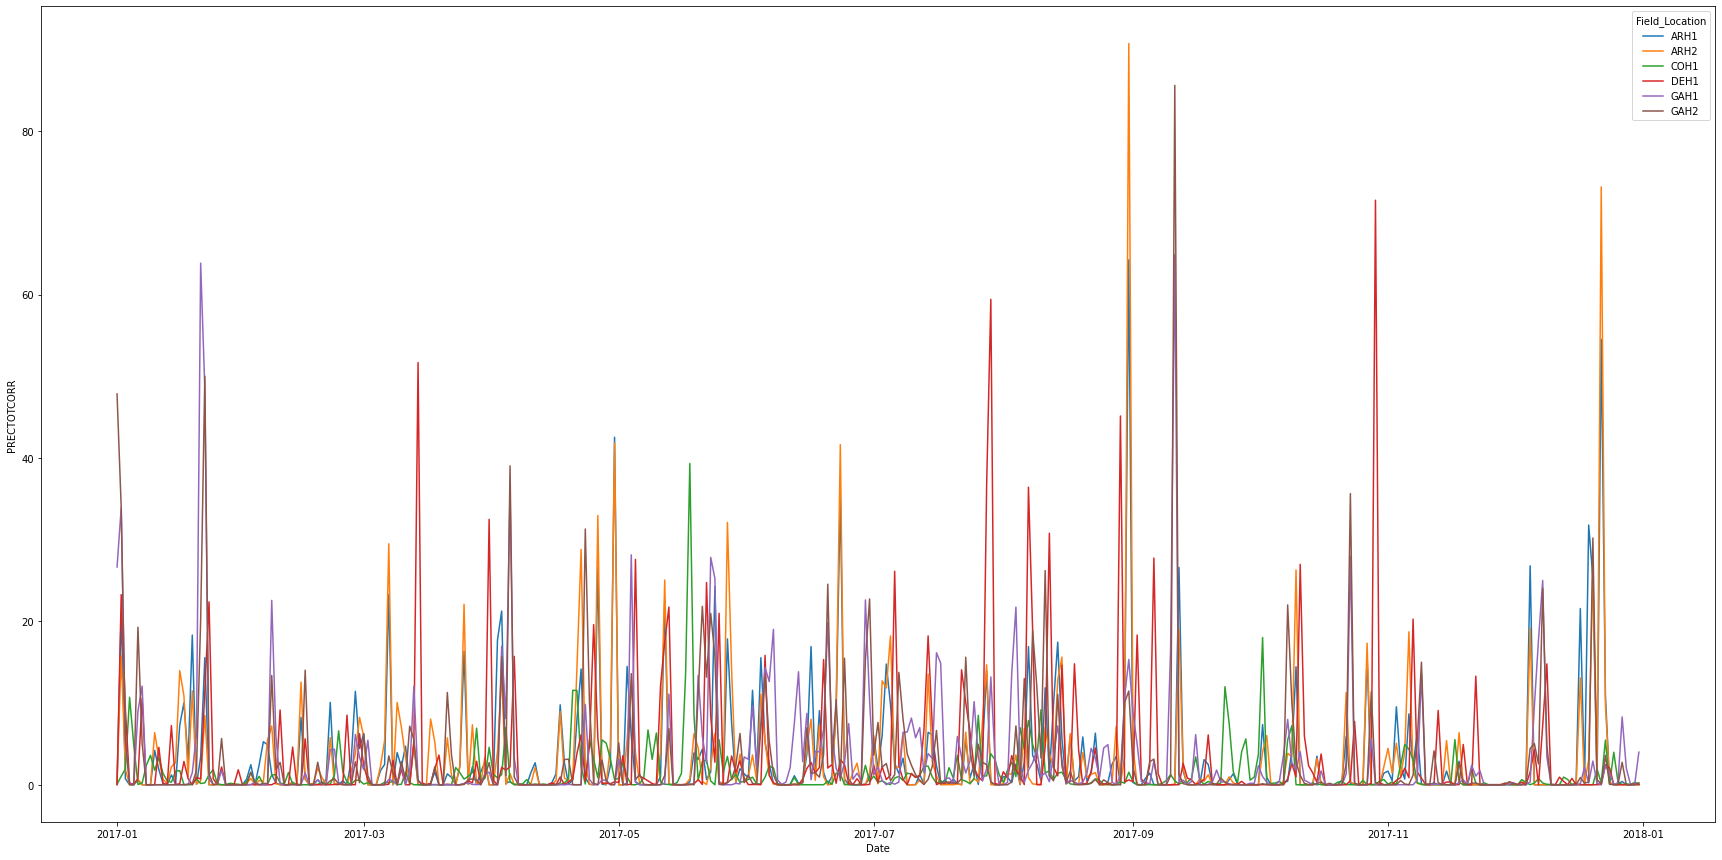

In [27]:
plt.figure(figsize=(30, 15))
sns.lineplot(data = plot_df, x = "Date", y = "PRECTOTCORR", hue = "Field_Location")

# Extracting time series features with tsfreash

In [16]:
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [41]:
extracted_features = extract_features(train_weather.drop(['Date', 'Field_Location'], axis=1), 
                                      column_id="Env", 
                                      column_sort="Month_Day")

Feature Extraction: 100%|█████████████████████████| 25/25 [06:25<00:00, 15.41s/it]


In [44]:
extracted_features.head()

T2M_MAX__variance_larger_than_standard_deviation  \
ARH1_2016                                               1.0   
ARH1_2017                                               1.0   
ARH1_2018                                               1.0   
ARH2_2016                                               1.0   
ARH2_2017                                               1.0   

           T2M_MAX__has_duplicate_max  T2M_MAX__has_duplicate_min  \
ARH1_2016                         0.0                         0.0   
ARH1_2017                         0.0                         0.0   
ARH1_2018                         0.0                         0.0   
ARH2_2016                         0.0                         0.0   
ARH2_2017                         0.0                         0.0   

           T2M_MAX__has_duplicate  T2M_MAX__sum_values  T2M_MAX__abs_energy  \
ARH1_2016                     1.0              8794.98          244801.0758   
ARH1_2017                     1.0              8742.43          235775.2445   
ARH1_2018                     1.0              8245.96          224860.7552   
ARH2_2016                     1.0              8019.60          207483.2608   
ARH2_2017                     1.0              8265.66          215458.1422   

           T2M_MAX__mean_abs_change  T2M_MAX__mean_change  \
ARH1_2016                  2.735589              0.003425   
ARH1_2017                  3.023956             -0.045769   
ARH1_2018                  3.072418              0.066374   
ARH2_2016                  2.673699             -0.001151   
ARH2_2017                  3.131786             -0.042335   

           T2M_MAX__mean_second_derivative_central  T2M_MAX__median  ...  \
ARH1_2016                                -0.007569           25.390  ...   
ARH1_2017                                -0.018333           25.670  ...   
ARH1_2018                                 0.012025           22.870  ...   
ARH2_2016                                -0.010165           24.055  ...   
ARH2_2017                                -0.018154           24.280  ...   

           ALLSKY_SFC_PAR_TOT__fourier_entropy__bins_5  \
ARH1_2016                                     0.045395   
ARH1_2017                                     0.090729   
ARH1_2018                                     0.045395   
ARH2_2016                                     0.045395   
ARH2_2017                                     0.090729   

           ALLSKY_SFC_PAR_TOT__fourier_entropy__bins_10  \
ARH1_2016                                      0.209069   
ARH1_2017                                      0.254093   
ARH1_2018                                      0.155665   
ARH2_2016                                      0.155665   
ARH2_2017                                      0.278098   

           ALLSKY_SFC_PAR_TOT__fourier_entropy__bins_100  \
ARH1_2016                                       1.794950   
ARH1_2017                                       1.892730   
ARH1_2018                                       1.139447   
ARH2_2016                                       1.792552   
ARH2_2017                                       1.936117   

           ALLSKY_SFC_PAR_TOT__permutation_entropy__dimension_3__tau_1  \
ARH1_2016                                           1.767377             
ARH1_2017                                           1.776410             
ARH1_2018                                           1.769306             
ARH2_2016                                           1.778620             
ARH2_2017                                           1.774649             

           ALLSKY_SFC_PAR_TOT__permutation_entropy__dimension_4__tau_1  \
ARH1_2016                                           3.083961             
ARH1_2017                                           3.117331             
ARH1_2018                                           3.085304             
ARH2_2016                                           3.094266             
ARH2_2017                             

In [43]:
train_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Training_Data/4_Training_Weather_Data_2014_2021.csv')

(77431, 20)

In [81]:
# extracted_features.to_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features.csv')
extracted_features = pd.read_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features.csv', index_col=0)

In [92]:
dict(extracted_features.isna().sum().sort_values(ascending=False)/extracted_features.shape[0])

{'T2MWET__query_similarity_count__query_None__threshold_0.0': 1.0,
 'GWETROOT__friedrich_coefficients__coeff_1__m_3__r_30': 1.0,
 'GWETPROF__friedrich_coefficients__coeff_3__m_3__r_30': 1.0,
 'GWETPROF__friedrich_coefficients__coeff_2__m_3__r_30': 1.0,
 'T2M_MAX__query_similarity_count__query_None__threshold_0.0': 1.0,
 'GWETPROF__friedrich_coefficients__coeff_1__m_3__r_30': 1.0,
 'GWETPROF__friedrich_coefficients__coeff_0__m_3__r_30': 1.0,
 'T2M__query_similarity_count__query_None__threshold_0.0': 1.0,
 'ALLSKY_SFC_SW_DWN__query_similarity_count__query_None__threshold_0.0': 1.0,
 'T2MDEW__query_similarity_count__query_None__threshold_0.0': 1.0,
 'GWETROOT__max_langevin_fixed_point__m_3__r_30': 1.0,
 'GWETROOT__query_similarity_count__query_None__threshold_0.0': 1.0,
 'T2M_MIN__query_similarity_count__query_None__threshold_0.0': 1.0,
 'GWETROOT__friedrich_coefficients__coeff_3__m_3__r_30': 1.0,
 'GWETROOT__friedrich_coefficients__coeff_2__m_3__r_30': 1.0,
 'QV2M__query_similarity_count

In [94]:
# impute(extracted_features)

In [259]:
# Select features based on mean yield per environment
y = train_trait.loc[train_trait['Env'].isin(extracted_features.index),:].groupby('Env')['Yield_Mg_ha'].mean()
# features_filtered = select_features(extracted_features, y)
features_filtered = select_features(extracted_features.dropna(axis=1), y, fdr_level=0.05)

In [155]:
features_filtered

T2M_MAX__ratio_beyond_r_sigma__r_1.5  \
ARH1_2016                              0.101093   
ARH1_2017                              0.109589   
ARH1_2018                              0.084932   
ARH2_2016                              0.101093   
ARH2_2017                              0.112329   
...                                         ...   
WIH2_2019                              0.079452   
WIH2_2020                              0.092896   
WIH2_2021                              0.065753   
WIH3_2020                              0.087432   
WIH3_2021                              0.063014   

           T2M_MAX__ratio_beyond_r_sigma__r_0.5  \
ARH1_2016                              0.691257   
ARH1_2017                              0.673973   
ARH1_2018                              0.734247   
ARH2_2016                              0.693989   
ARH2_2017                              0.682192   
...                                         ...   
WIH2_2019                              0.761644   
WIH2_2020                              0.765027   
WIH2_2021                              0.756164   
WIH3_2020                              0.765027   
WIH3_2021                              0.750685   

           T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.088552                   
ARH1_2017                                           0.064989                   
ARH1_2018                                           0.050390                   
ARH2_2016                                           0.086550                   
ARH2_2017                                           0.058276                   
...                                                      ...                   
WIH2_2019                                           0.013070                   
WIH2_2020                                           0.043660                   
WIH2_2021                                           0.028040                   
WIH3_2020                                           0.039291                   
WIH3_2021                                           0.028119                   

           T2M__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.067346               
ARH1_2017                                           0.049833               
ARH1_2018                                           0.033787               
ARH2_2016                                           0.061922               
ARH2_2017                                           0.043711               
...                                                      ...               
WIH2_2019                                           0.009615               
WIH2_2020                                           0.024686               
WIH2_2021                                           0.013443               
WIH3_2020                                           0.021578               
WIH3_2021                                           0.013421               

           ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2  \
ARH1_2016                                      0.002732   
ARH1_2017                                      0.000000   
ARH1_2018                                      0.010959   
ARH2_2016                                      0.005464   
ARH2_2017                                      0.005479   
...                                                 ...   
WIH2_2019                                      0.035616   
WIH2_2020                                      0.030055   
WIH2_2021                                      0.030137   
WIH3_2020                                      0.019126   
WIH3_2021                                      0.024658   

           T2M_MAX__ar_coefficient__coeff_0__k_10  \
ARH1_2016                                0.961571   
ARH1_2017                                0.711416   
ARH1_2018                                0.

In [159]:
features_filtered

T2M_MAX__ratio_beyond_r_sigma__r_1.5  \
ARH1_2016                              0.101093   
ARH1_2017                              0.109589   
ARH1_2018                              0.084932   
ARH2_2016                              0.101093   
ARH2_2017                              0.112329   
...                                         ...   
WIH2_2019                              0.079452   
WIH2_2020                              0.092896   
WIH2_2021                              0.065753   
WIH3_2020                              0.087432   
WIH3_2021                              0.063014   

           T2M_MAX__ratio_beyond_r_sigma__r_0.5  \
ARH1_2016                              0.691257   
ARH1_2017                              0.673973   
ARH1_2018                              0.734247   
ARH2_2016                              0.693989   
ARH2_2017                              0.682192   
...                                         ...   
WIH2_2019                              0.761644   
WIH2_2020                              0.765027   
WIH2_2021                              0.756164   
WIH3_2020                              0.765027   
WIH3_2021                              0.750685   

           T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.088552                   
ARH1_2017                                           0.064989                   
ARH1_2018                                           0.050390                   
ARH2_2016                                           0.086550                   
ARH2_2017                                           0.058276                   
...                                                      ...                   
WIH2_2019                                           0.013070                   
WIH2_2020                                           0.043660                   
WIH2_2021                                           0.028040                   
WIH3_2020                                           0.039291                   
WIH3_2021                                           0.028119                   

           T2M__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.067346               
ARH1_2017                                           0.049833               
ARH1_2018                                           0.033787               
ARH2_2016                                           0.061922               
ARH2_2017                                           0.043711               
...                                                      ...               
WIH2_2019                                           0.009615               
WIH2_2020                                           0.024686               
WIH2_2021                                           0.013443               
WIH3_2020                                           0.021578               
WIH3_2021                                           0.013421               

           ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2  \
ARH1_2016                                      0.002732   
ARH1_2017                                      0.000000   
ARH1_2018                                      0.010959   
ARH2_2016                                      0.005464   
ARH2_2017                                      0.005479   
...                                                 ...   
WIH2_2019                                      0.035616   
WIH2_2020                                      0.030055   
WIH2_2021                                      0.030137   
WIH3_2020                                      0.019126   
WIH3_2021                                      0.024658   

           T2M_MAX__ar_coefficient__coeff_0__k_10  \
ARH1_2016                                0.961571   
ARH1_2017                                0.711416   
ARH1_2018                                0.

In [317]:
# features_filtered.to_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered.csv')
features_filtered = pd.read_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered.csv', index_col=0)

# Removing correlated features before association testing

In [109]:
# from tslearn.utils import to_time_series_dataset

In [194]:
%%time
features_filtered_corr = features_filtered.corr().abs()

CPU times: user 75.9 ms, sys: 5.59 ms, total: 81.4 ms
Wall time: 80.1 ms


In [198]:
# Select upper triangle of correlation matrix
upper = features_filtered_corr.where(np.triu(np.ones(features_filtered_corr.shape), k=1).astype(bool))

# Find number features with correlation greater than 0.8
print([column for column in upper.columns if any(upper[column] > 0.8)])

403


Most of the features selected are correlated. Should filter out correlated features first before performing feature association test.

In [177]:
%%time
extracted_features_corr = extracted_features.corr().abs()

CPU times: user 54.4 s, sys: 936 ms, total: 55.4 s
Wall time: 55.5 s


In [203]:
%%time
# Calculate feature relavence based on mean yield per environment
y = train_trait.loc[train_trait['Env'].isin(extracted_features.index),:].groupby('Env')['Yield_Mg_ha'].mean()
features_relevance_table = calculate_relevance_table(extracted_features.dropna(axis=1), y)

CPU times: user 1.1 s, sys: 323 ms, total: 1.42 s
Wall time: 3.76 s


In [204]:
features_relevance_table

feature  \
feature                                                                                                 
T2M_MAX__ratio_beyond_r_sigma__r_1.5                             T2M_MAX__ratio_beyond_r_sigma__r_1.5   
T2M_MAX__ratio_beyond_r_sigma__r_0.5                             T2M_MAX__ratio_beyond_r_sigma__r_0.5   
T2M_MAX__energy_ratio_by_chunks__num_segments_1...  T2M_MAX__energy_ratio_by_chunks__num_segments_...   
T2M__energy_ratio_by_chunks__num_segments_10__s...  T2M__energy_ratio_by_chunks__num_segments_10__...   
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2             ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2   
...                                                                                               ...   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6           ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7           ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10         ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10   
ALLSKY_SFC_PAR_TOT__count_above__t_0                             ALLSKY_SFC_PAR_TOT__count_above__t_0   
ALLSKY_SFC_PAR_TOT__count_below__t_0                             ALLSKY_SFC_PAR_TOT__count_below__t_0   

                                                        type       p_value  \
feature                                                                      
T2M_MAX__ratio_beyond_r_sigma__r_1.5                    real  4.064867e-15   
T2M_MAX__ratio_beyond_r_sigma__r_0.5                    real  9.727250e-14   
T2M_MAX__energy_ratio_by_chunks__num_segments_1...      real  1.130393e-13   
T2M__energy_ratio_by_chunks__num_segments_10__s...      real  1.658672e-12   
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2            real  2.409559e-12   
...                                                      ...           ...   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6       constant           NaN   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7       constant           NaN   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10      constant           NaN   
ALLSKY_SFC_PAR_TOT__count_above__t_0                constant           NaN   
ALLSKY_SFC_PAR_TOT__count_below__t_0                constant           NaN   

                                                    relevant  
feature                                                       
T2M_MAX__ratio_beyond_r_sigma__r_1.5                    True  
T2M_MAX__ratio_beyond_r_sigma__r_0.5                    True  
T2M_MAX__energy_ratio_by_chunks__num_segments_1...      True  
T2M__energy_ratio_by_chunks__num_segments_10__s...      True  
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2            True  
...                                                      ...  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6          False  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7          False  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10         False  
ALLSKY_SFC_PAR_TOT__count_above__t_0                   False  
ALLSKY_SFC_PAR_TOT__count_below__t_0                   False  

[12487 rows x 4 columns]

In [277]:
%%time
corr_thresh = 0.8
i = 0
filtered_features_relevance_table = features_relevance_table
while i < filtered_features_relevance_table.shape[0]:
    feature = filtered_features_relevance_table['feature'][i]
    corr_features = extracted_features_corr.index[extracted_features_corr.loc[feature] > corr_thresh].drop(feature, errors='ignore')
    corr_features = corr_features[corr_features.isin(filtered_features_relevance_table.index)]
    filtered_features_relevance_table = filtered_features_relevance_table.drop(corr_features, axis=0)
    i = i + 1

CPU times: user 8.61 s, sys: 62.3 ms, total: 8.67 s
Wall time: 8.66 s


In [278]:
filtered_features_relevance_table

feature  \
feature                                                                                                 
T2M_MAX__ratio_beyond_r_sigma__r_1.5                             T2M_MAX__ratio_beyond_r_sigma__r_1.5   
T2M_MAX__ratio_beyond_r_sigma__r_0.5                             T2M_MAX__ratio_beyond_r_sigma__r_0.5   
T2M_MAX__energy_ratio_by_chunks__num_segments_1...  T2M_MAX__energy_ratio_by_chunks__num_segments_...   
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2             ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2   
T2M_MAX__ar_coefficient__coeff_0__k_10                         T2M_MAX__ar_coefficient__coeff_0__k_10   
...                                                                                               ...   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6           ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7           ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10         ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10   
ALLSKY_SFC_PAR_TOT__count_above__t_0                             ALLSKY_SFC_PAR_TOT__count_above__t_0   
ALLSKY_SFC_PAR_TOT__count_below__t_0                             ALLSKY_SFC_PAR_TOT__count_below__t_0   

                                                        type       p_value  \
feature                                                                      
T2M_MAX__ratio_beyond_r_sigma__r_1.5                    real  4.064867e-15   
T2M_MAX__ratio_beyond_r_sigma__r_0.5                    real  9.727250e-14   
T2M_MAX__energy_ratio_by_chunks__num_segments_1...      real  1.130393e-13   
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2            real  2.409559e-12   
T2M_MAX__ar_coefficient__coeff_0__k_10                  real  2.413500e-12   
...                                                      ...           ...   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6       constant           NaN   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7       constant           NaN   
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10      constant           NaN   
ALLSKY_SFC_PAR_TOT__count_above__t_0                constant           NaN   
ALLSKY_SFC_PAR_TOT__count_below__t_0                constant           NaN   

                                                    relevant  
feature                                                       
T2M_MAX__ratio_beyond_r_sigma__r_1.5                    True  
T2M_MAX__ratio_beyond_r_sigma__r_0.5                    True  
T2M_MAX__energy_ratio_by_chunks__num_segments_1...      True  
ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2            True  
T2M_MAX__ar_coefficient__coeff_0__k_10                  True  
...                                                      ...  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_6          False  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_7          False  
ALLSKY_SFC_PAR_TOT__ratio_beyond_r_sigma__r_10         False  
ALLSKY_SFC_PAR_TOT__count_above__t_0                   False  
ALLSKY_SFC_PAR_TOT__count_below__t_0                   False  

[6577 rows x 4 columns]

In [279]:
extracted_features

T2M_MAX__variance_larger_than_standard_deviation  \
ARH1_2016                                               1.0   
ARH1_2017                                               1.0   
ARH1_2018                                               1.0   
ARH2_2016                                               1.0   
ARH2_2017                                               1.0   
...                                                     ...   
WIH2_2019                                               1.0   
WIH2_2020                                               1.0   
WIH2_2021                                               1.0   
WIH3_2020                                               1.0   
WIH3_2021                                               1.0   

           T2M_MAX__has_duplicate_max  T2M_MAX__has_duplicate_min  \
ARH1_2016                         0.0                         0.0   
ARH1_2017                         0.0                         0.0   
ARH1_2018                         0.0                         0.0   
ARH2_2016                         0.0                         0.0   
ARH2_2017                         0.0                         0.0   
...                               ...                         ...   
WIH2_2019                         0.0                         0.0   
WIH2_2020                         0.0                         0.0   
WIH2_2021                         0.0                         0.0   
WIH3_2020                         0.0                         0.0   
WIH3_2021                         0.0                         0.0   

           T2M_MAX__has_duplicate  T2M_MAX__sum_values  T2M_MAX__abs_energy  \
ARH1_2016                     1.0              8794.98          244801.0758   
ARH1_2017                     1.0              8742.43          235775.2445   
ARH1_2018                     1.0              8245.96          224860.7552   
ARH2_2016                     1.0              8019.60          207483.2608   
ARH2_2017                     1.0              8265.66          215458.1422   
...                           ...                  ...                  ...   
WIH2_2019                     1.0              4115.87          103361.8817   
WIH2_2020                     1.0              4648.01          104878.1823   
WIH2_2021                     1.0              5157.69          131286.8681   
WIH3_2020                     1.0              4439.52           99764.1352   
WIH3_2021                     1.0              4870.10          119811.2422   

           T2M_MAX__mean_abs_change  T2M_MAX__mean_change  \
ARH1_2016                  2.735589              0.003425   
ARH1_2017                  3.023956             -0.045769   
ARH1_2018                  3.072418              0.066374   
ARH2_2016                  2.673699             -0.001151   
ARH2_2017                  3.131786             -0.042335   
...                             ...                   ...   
WIH2_2019                  2.904451              0.008956   
WIH2_2020                  2.975479             -0.017890   
WIH2_2021                  2.847005              0.002995   
WIH3_2020                  2.878055             -0.016411   
WIH3_2021                  2.750055              0.001813   

           T2M_MAX__mean_second_derivative_central  T2M_MAX__median  ...  \
ARH1_2016                                -0.007569           25.390  ...   
ARH1_2017                                -0.018333           25.670  ...   
ARH1_2018                                 0.012025           22.870  ...   
ARH2_2016                                -0.010165           24.055  ...   
ARH2_2017                                -0.018154           24.280  ...   
...                                            ...              ...  ...   
WIH2_2019                                -0.008609           12.900  ...   
WIH2_2020                                -0.006703           12.445  ...   
WIH2_2021                                 0.002080         

In [319]:
# Select features based on mean yield per environment
y = train_trait.loc[train_trait['Env'].isin(extracted_features.index),:].groupby('Env')['Yield_Mg_ha'].mean()
features_filtered2 = select_features(extracted_features.dropna(axis=1)[filtered_features_relevance_table.index], 
                                    y, fdr_level=0.05)

In [320]:
features_filtered2

T2M_MAX__ratio_beyond_r_sigma__r_1.5  \
ARH1_2016                              0.101093   
ARH1_2017                              0.109589   
ARH1_2018                              0.084932   
ARH2_2016                              0.101093   
ARH2_2017                              0.112329   
...                                         ...   
WIH2_2019                              0.079452   
WIH2_2020                              0.092896   
WIH2_2021                              0.065753   
WIH3_2020                              0.087432   
WIH3_2021                              0.063014   

           T2M_MAX__ratio_beyond_r_sigma__r_0.5  \
ARH1_2016                              0.691257   
ARH1_2017                              0.673973   
ARH1_2018                              0.734247   
ARH2_2016                              0.693989   
ARH2_2017                              0.682192   
...                                         ...   
WIH2_2019                              0.761644   
WIH2_2020                              0.765027   
WIH2_2021                              0.756164   
WIH3_2020                              0.765027   
WIH3_2021                              0.750685   

           T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.088552                   
ARH1_2017                                           0.064989                   
ARH1_2018                                           0.050390                   
ARH2_2016                                           0.086550                   
ARH2_2017                                           0.058276                   
...                                                      ...                   
WIH2_2019                                           0.013070                   
WIH2_2020                                           0.043660                   
WIH2_2021                                           0.028040                   
WIH3_2020                                           0.039291                   
WIH3_2021                                           0.028119                   

           ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2  \
ARH1_2016                                      0.002732   
ARH1_2017                                      0.000000   
ARH1_2018                                      0.010959   
ARH2_2016                                      0.005464   
ARH2_2017                                      0.005479   
...                                                 ...   
WIH2_2019                                      0.035616   
WIH2_2020                                      0.030055   
WIH2_2021                                      0.030137   
WIH3_2020                                      0.019126   
WIH3_2021                                      0.024658   

           T2M_MAX__ar_coefficient__coeff_0__k_10  \
ARH1_2016                                0.961571   
ARH1_2017                                0.711416   
ARH1_2018                                0.856279   
ARH2_2016                                0.966231   
ARH2_2017                                0.625354   
...                                           ...   
WIH2_2019                                0.281956   
WIH2_2020                                0.294866   
WIH2_2021                                0.359738   
WIH3_2020                                0.287047   
WIH3_2021                                0.318938   

           ALLSKY_SFC_SW_DNI__c3__lag_1  \
ARH1_2016                   8627.879713   
ARH1_2017                   7344.521043   
ARH1_2018                   6302.136642   
ARH2_2016                   8319.310972   
ARH2_2017                   7497.796036   
...                                 ...   
WIH2_2019                   3595.969040   
WIH2_2020                   5787.658382   
WIH2_2021                   5005.068826   
WIH3_2020                   5314.149234   
WIH3_

In [11]:
# features_filtered2.to_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered_2.csv')
features_filtered2 = pd.read_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered_2.csv', index_col=0)

In [14]:
features_filtered2

T2M_MAX__ratio_beyond_r_sigma__r_1.5  \
ARH1_2016                              0.101093   
ARH1_2017                              0.109589   
ARH1_2018                              0.084932   
ARH2_2016                              0.101093   
ARH2_2017                              0.112329   
...                                         ...   
WIH2_2019                              0.079452   
WIH2_2020                              0.092896   
WIH2_2021                              0.065753   
WIH3_2020                              0.087432   
WIH3_2021                              0.063014   

           T2M_MAX__ratio_beyond_r_sigma__r_0.5  \
ARH1_2016                              0.691257   
ARH1_2017                              0.673973   
ARH1_2018                              0.734247   
ARH2_2016                              0.693989   
ARH2_2017                              0.682192   
...                                         ...   
WIH2_2019                              0.761644   
WIH2_2020                              0.765027   
WIH2_2021                              0.756164   
WIH3_2020                              0.765027   
WIH3_2021                              0.750685   

           T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
ARH1_2016                                           0.088552                   
ARH1_2017                                           0.064989                   
ARH1_2018                                           0.050390                   
ARH2_2016                                           0.086550                   
ARH2_2017                                           0.058276                   
...                                                      ...                   
WIH2_2019                                           0.013070                   
WIH2_2020                                           0.043660                   
WIH2_2021                                           0.028040                   
WIH3_2020                                           0.039291                   
WIH3_2021                                           0.028119                   

           ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2  \
ARH1_2016                                      0.002732   
ARH1_2017                                      0.000000   
ARH1_2018                                      0.010959   
ARH2_2016                                      0.005464   
ARH2_2017                                      0.005479   
...                                                 ...   
WIH2_2019                                      0.035616   
WIH2_2020                                      0.030055   
WIH2_2021                                      0.030137   
WIH3_2020                                      0.019126   
WIH3_2021                                      0.024658   

           T2M_MAX__ar_coefficient__coeff_0__k_10  \
ARH1_2016                                0.961571   
ARH1_2017                                0.711416   
ARH1_2018                                0.856279   
ARH2_2016                                0.966231   
ARH2_2017                                0.625354   
...                                           ...   
WIH2_2019                                0.281956   
WIH2_2020                                0.294866   
WIH2_2021                                0.359738   
WIH3_2020                                0.287047   
WIH3_2021                                0.318938   

           ALLSKY_SFC_SW_DNI__c3__lag_1  \
ARH1_2016                   8627.879713   
ARH1_2017                   7344.521043   
ARH1_2018                   6302.136642   
ARH2_2016                   8319.310972   
ARH2_2017                   7497.796036   
...                                 ...   
WIH2_2019                   3595.969040   
WIH2_2020                   5787.658382   
WIH2_2021                   5005.068826   
WIH3_2020                   5314.149234   
WIH3_

In [112]:
test_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Testing_Data/4_Testing_Weather_Data_2022.csv')

test_weather['Date'] = pd.to_datetime(test_weather['Date'], format='%Y%m%d')
test_weather['Month_Day'] = test_weather['Date'].dt.strftime('%m-%d')
test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94204/1643920210.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')


In [113]:
test_weather.index = test_weather['Env']
test_weather = test_weather.drop(['Env', 'Date', 'Field_Location', 'Month_Day'], axis=1)

In [114]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
test_weather_scaled = pd.DataFrame(min_max_scaler.fit_transform(test_weather), index=test_weather.index, columns=test_weather.columns)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(test_weather_scaled)
test_weather_scaled = pd.DataFrame(imputer.transform(test_weather_scaled), index=test_weather_scaled.index, columns=test_weather_scaled.columns)

In [115]:
# test_weather_scaled['Env'] = test_weather_scaled.index

In [116]:
test_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Testing_Data/4_Testing_Weather_Data_2022.csv')

test_weather['Date'] = pd.to_datetime(test_weather['Date'], format='%Y%m%d')
test_weather['Month_Day'] = test_weather['Date'].dt.strftime('%m-%d')
test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')

/var/folders/x1/68s4ss8j44bgn7dv42vcp9qh0000gp/T/ipykernel_94204/1643920210.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_weather['Field_Location'] = test_weather['Env'].str.replace('_\d{4}', '')


In [124]:
test_weather.index = test_weather_scaled.index
test_weather_scaled['Month_Day'] = test_weather['Month_Day']
test_weather_scaled = test_weather_scaled.reset_index()

In [125]:
test_weather_scaled.head()

Env      QV2M        PS      WS2M  ALLSKY_SFC_SW_DWN      RH2M  \
0  DEH1_2022  0.435211  0.792361  0.333679           0.024457  0.967815   
1  DEH1_2022  0.435211  0.779861  0.376166           0.043478  0.907090   
2  DEH1_2022  0.134742  0.852083  0.716062           0.038383  0.778959   
3  DEH1_2022  0.080282  0.944444  0.194819           0.324728  0.797024   
4  DEH1_2022  0.203286  0.843750  0.306736           0.152853  0.989677   

    GWETTOP    T2MWET   T2M_MAX    T2MDEW  GWETROOT  GWETPROF       T2M  \
0  0.555556  0.717145  0.587689  0.751561  0.555556  0.551724  0.653072   
1  0.634921  0.721763  0.582711  0.748829  0.603175  0.586207  0.663758   
2  0.650794  0.437368  0.426912  0.448087  0.619048  0.620690  0.411576   
3  0.634921  0.337887  0.321055  0.345824  0.634921  0.620690  0.320748   
4  0.698413  0.514335  0.388585  0.548400  0.650794  0.637931  0.462867   

    T2M_MIN  ALLSKY_SFC_PAR_TOT  PRECTOTCORR  ALLSKY_SFC_SW_DNI Month_Day  
0  0.689189            0.042543     0.028037           0.009499     01-01  
1  0.664685            0.072313     0.087472           0.012370     01-02  
2  0.402883            0.060213     0.157901           0.026066     01-03  
3  0.336577            0.440891     0.000061           0.544732     01-04  
4  0.421622            0.222894     0.017898           0.039982     01-05

In [126]:
test_extracted_features = extract_features(test_weather_scaled, 
                                      column_id="Env", 
                                      column_sort="Month_Day")

Feature Extraction: 100%|███████████████████████████| 25/25 [00:39<00:00,  1.59s/it]


In [129]:
test_extracted_features[features_filtered2.columns].to_csv('4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered.csv')

T2M_MAX__ratio_beyond_r_sigma__r_1.5  \
DEH1_2022                              0.117834   
GAH1_2022                              0.133758   
GAH2_2022                              0.114650   
IAH1_2022                              0.111465   
IAH2_2022                              0.092357   
IAH3_2022                              0.108280   
IAH4_2022                              0.105096   
ILH1_2022                              0.105096   
INH1_2022                              0.114650   
MIH1_2022                              0.121019   
MNH1_2022                              0.098726   
MOH2_2022                              0.121019   
NCH1_2022                              0.114650   
NEH1_2022                              0.095541   
NEH2_2022                              0.105096   
NEH3_2022                              0.105096   
NYH2_2022                              0.108280   
NYH3_2022                              0.108280   
OHH1_2022                              0.124204   
SCH1_2022                              0.117834   
TXH1_2022                              0.114650   
TXH2_2022                              0.114650   
TXH3_2022                              0.114650   
WIH1_2022                              0.114650   
WIH2_2022                              0.121019   
WIH3_2022                              0.114650   

           T2M_MAX__ratio_beyond_r_sigma__r_0.5  \
DEH1_2022                              0.681529   
GAH1_2022                              0.579618   
GAH2_2022                              0.687898   
IAH1_2022                              0.729299   
IAH2_2022                              0.729299   
IAH3_2022                              0.732484   
IAH4_2022                              0.729299   
ILH1_2022                              0.697452   
INH1_2022                              0.700637   
MIH1_2022                              0.735669   
MNH1_2022                              0.751592   
MOH2_2022                              0.700637   
NCH1_2022                              0.700637   
NEH1_2022                              0.729299   
NEH2_2022                              0.713376   
NEH3_2022                              0.713376   
NYH2_2022                              0.681529   
NYH3_2022                              0.681529   
OHH1_2022                              0.700637   
SCH1_2022                              0.707006   
TXH1_2022                              0.633758   
TXH2_2022                              0.633758   
TXH3_2022                              0.633758   
WIH1_2022                              0.716561   
WIH2_2022                              0.716561   
WIH3_2022                              0.729299   

           T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8  \
DEH1_2022                                           0.111911                   
GAH1_2022                                           0.099607                   
GAH2_2022                                           0.106585                   
IAH1_2022                                           0.125286                   
IAH2_2022                                           0.121760                   
IAH3_2022                                           0.122206                   
IAH4_2022                                           0.122319                   
ILH1_2022                                           0.114375                   
INH1_2022                                           0.113678                   
MIH1_2022                                           0.117715                   
MNH1_2022                                           0.121313                   
MOH2_2022                                           0.128245                   
NCH1_2022                                           0.111495                   
NEH1_2022                                           0.125514                   
NEH2_2022                                           0.1